In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [5]:
df = pd.read_excel('./rawdata/metro_data_restart.xlsx')
df

사용월    호선명       지하철역 행정구역  transfer_line  대합실면적  승강장면적  월일수  \
0      202111  우이신설선   4.19민주묘지  강북구            1.0    NaN    NaN   30   
1      202112  우이신설선   4.19민주묘지  강북구            1.0    NaN    NaN   31   
2      202201  우이신설선   4.19민주묘지  강북구            1.0    NaN    NaN   31   
3      202202  우이신설선   4.19민주묘지  강북구            1.0    NaN    NaN   28   
4      202203  우이신설선   4.19민주묘지  강북구            1.0    NaN    NaN   31   
...       ...    ...        ...  ...            ...    ...    ...  ...   
13056  202406    9호선  흑석(중앙대입구)  동작구            1.0    NaN    NaN   30   
13057  202407    9호선  흑석(중앙대입구)  동작구            1.0    NaN    NaN   31   
13058  202408    9호선  흑석(중앙대입구)  동작구            1.0    NaN    NaN   31   
13059  202409    9호선  흑석(중앙대입구)  동작구            1.0    NaN    NaN   30   
13060  202410    9호선  흑석(중앙대입구)  동작구            1.0    NaN    NaN   31   

       04시-05시 승차인원  04시-05시 하차인원  ...  23시-24시 하차인원  00시-01시 승차인원  \
0                 2             0  ...          2179             0   
1                 0             1  ...          1720             0   
2                 3             2  ...          1309             0   
3                 0             0  ...          1293             0   
4                 0             0  ...          2136             1   
...             ...           ...  ...           ...           ...   
13056             4             0  ...          7126          1071   
13057             0             0  ...          6699           652   
13058             5             0  ...          6354           575   
13059             8             0  ...          6146           955   
13060             5             0  ...          6423           954   

       00시-01시 하차인원  01시-02시 승차인원  01시-02시 하차인원  02시-03시 승차인원  02시-03시 하차인원  \
0                28             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                40             0             0             0             0   
...             ...           ...           ...           ...           ...   
13056          2518             0            33             0             1   
13057          2727             0            25             0             0   
13058          2372             0            27             0             0   
13059          2272             7            42             0             2   
13060          2335             0            33             0             0   

       03시-04시 승차인원  03시-04시 하차인원      작업일자  
0                 0             0  20211203  
1                 0             0  20220103  
2                 0             0  20220203  
3                 0             0  20220303  
4                 0             0  20220403  
...             ...           ...       ...  
13056             0             0  20240703  
13057             0             0  20240803  
13058             0             0  20240903  
13059             0             0  20241003  
13060             0             0  20241103  

[13061 rows x 57 columns]

In [6]:

for col in df.columns :
    if '승차인원' in col :
        exit_col = col.replace('승차인원', '하차인원')
        if exit_col in df.columns :
            stay_col = col.replace('승차인원', '체류인원')
            df[stay_col] = df[col] + df[exit_col]

df.head(2)

사용월    호선명      지하철역 행정구역  transfer_line  대합실면적  승강장면적  월일수  \
0  202111  우이신설선  4.19민주묘지  강북구            1.0    NaN    NaN   30   
1  202112  우이신설선  4.19민주묘지  강북구            1.0    NaN    NaN   31   

   04시-05시 승차인원  04시-05시 하차인원  ...  18시-19시 체류인원  19시-20시 체류인원  20시-21시 체류인원  \
0             2             0  ...         11217          9453          5773   
1             0             1  ...         10614          8862          5897   

   21시-22시 체류인원  22시-23시 체류인원  23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  \
0          4917          4159          2485            28             0   
1          5278          3839          1983             0             0   

   02시-03시 체류인원  03시-04시 체류인원  
0             0             0  
1             0             0  

[2 rows x 81 columns]

### 지하철 노선별 총 체류인원 분포

In [7]:
# 노선별 체류인원 평균

line_avg_stay = df.groupby('호선명').mean(numeric_only=True).reset_index()

stay_avg = line_avg_stay[['호선명'] + [col for col in df.columns if '체류인원' in col]]

stay_avg.head(3)

호선명  04시-05시 체류인원  05시-06시 체류인원  06시-07시 체류인원  07시-08시 체류인원   08시-09시 체류인원  \
0  1호선    377.741667   9303.222222  24625.533333  58661.980556  122902.916667   
1  2호선    317.628157  12622.428030  35238.319444  88971.334596  173224.400253   
2  3호선     65.786765   5380.632353  20393.924020  50000.133987   81454.564542   

    09시-10시 체류인원  10시-11시 체류인원  11시-12시 체류인원  12시-13시 체류인원  ...  \
0   85246.500000  66403.477778  75065.894444  81420.588889  ...   
1  122202.588384  77254.926768  72001.881944  77517.227273  ...   
2   58748.388072  43248.763072  41436.202614  43247.296569  ...   

    18시-19시 체류인원   19시-20시 체류인원  20시-21시 체류인원  21시-22시 체류인원  22시-23시 체류인원  \
0  130623.480556   68870.586111  50576.958333  48286.752778  34080.738889   
1  190005.578283  117018.107955  83995.377525  81799.708333  68586.707071   
2   88197.211601   54225.139706  38604.820261  34018.302288  27109.700163   

   23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  02시-03시 체류인원  03시-04시 체류인원  
0  16125.380556   2385.902778     96.941667      2.461111      0.000000  
1  35469.926768   7658.415404    328.952020      6.434343      0.648359  
2  12270.030229   2543.738562     66.678922      1.485294      0.260621  

[3 rows x 25 columns]

In [8]:
# 호선명을 인덱스로 설정하고 이름 바꾸기

line_avg = line_avg_stay[['호선명'] + [col for col in df.columns if '체류인원' in col]].set_index('호선명')
line_avg.index.name = 'line'

line_avg.head(3)

04시-05시 체류인원  05시-06시 체류인원  06시-07시 체류인원  07시-08시 체류인원   08시-09시 체류인원  \
line                                                                          
1호선     377.741667   9303.222222  24625.533333  58661.980556  122902.916667   
2호선     317.628157  12622.428030  35238.319444  88971.334596  173224.400253   
3호선      65.786765   5380.632353  20393.924020  50000.133987   81454.564542   

       09시-10시 체류인원  10시-11시 체류인원  11시-12시 체류인원  12시-13시 체류인원  13시-14시 체류인원  \
line                                                                          
1호선    85246.500000  66403.477778  75065.894444  81420.588889  85184.536111   
2호선   122202.588384  77254.926768  72001.881944  77517.227273  83813.234217   
3호선    58748.388072  43248.763072  41436.202614  43247.296569  45449.647059   

      ...   18시-19시 체류인원   19시-20시 체류인원  20시-21시 체류인원  21시-22시 체류인원  \
line  ...                                                             
1호선   ...  130623.480556   68870.586111  50576.958333  48286.752778   
2호선   ...  190005.578283  117018.107955  83995.377525  81799.708333   
3호선   ...   88197.211601   54225.139706  38604.820261  34018.302288   

      22시-23시 체류인원  23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  02시-03시 체류인원  \
line                                                                         
1호선   34080.738889  16125.380556   2385.902778     96.941667      2.461111   
2호선   68586.707071  35469.926768   7658.415404    328.952020      6.434343   
3호선   27109.700163  12270.030229   2543.738562     66.678922      1.485294   

      03시-04시 체류인원  
line                
1호선       0.000000  
2호선       0.648359  
3호선       0.260621  

[3 rows x 24 columns]

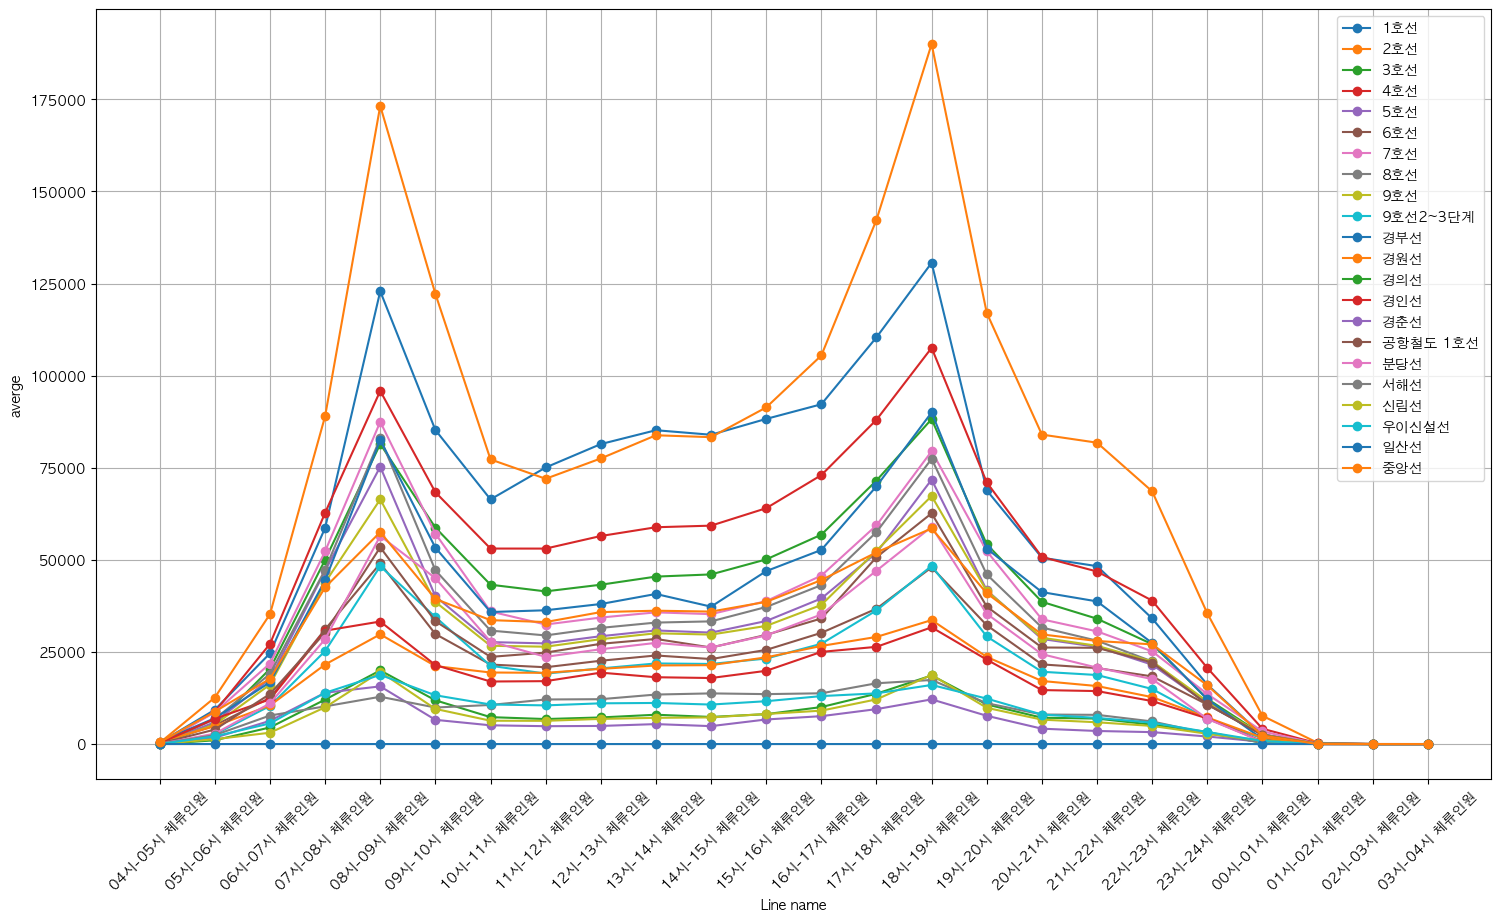

In [9]:
# 호선별 체류인원 변화 line graph

plt.figure(figsize=(18,10))

for line in line_avg.index:
    plt.plot([col for col in line_avg.columns if '체류인원' in col], line_avg.loc[line], marker='o', label=str(line))

plt.xlabel('Line name')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

### Analyze note
- 전체적으로 1호선과 2호선의 사용인원이 가장 많음을 확인 할 수 있음
- 노선별 승객 이용패턴도 연도별 이용패턴과 비슷한 양상을 보임


In [10]:
# 노선별 시간대 평균 중 상위 10% 월만 

top_10 = line_avg[line_avg.max(axis=1) > line_avg.quantile(0.9).max()]
top_10


04시-05시 체류인원  05시-06시 체류인원  06시-07시 체류인원  07시-08시 체류인원   08시-09시 체류인원  \
line                                                                          
1호선     377.741667   9303.222222  24625.533333  58661.980556  122902.916667   
2호선     317.628157  12622.428030  35238.319444  88971.334596  173224.400253   
4호선     168.550214   8762.869658  27172.026709  62776.039530   95857.675214   

       09시-10시 체류인원  10시-11시 체류인원  11시-12시 체류인원  12시-13시 체류인원  13시-14시 체류인원  \
line                                                                          
1호선    85246.500000  66403.477778  75065.894444  81420.588889  85184.536111   
2호선   122202.588384  77254.926768  72001.881944  77517.227273  83813.234217   
4호선    68349.808761  53062.996795  53053.706197  56468.195513  58845.876068   

      ...   18시-19시 체류인원   19시-20시 체류인원  20시-21시 체류인원  21시-22시 체류인원  \
line  ...                                                             
1호선   ...  130623.480556   68870.586111  50576.958333  48286.752778   
2호선   ...  190005.578283  117018.107955  83995.377525  81799.708333   
4호선   ...  107541.482906   71022.138889  50780.899573  46833.927350   

      22시-23시 체류인원  23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  02시-03시 체류인원  \
line                                                                         
1호선   34080.738889  16125.380556   2385.902778     96.941667      2.461111   
2호선   68586.707071  35469.926768   7658.415404    328.952020      6.434343   
4호선   38929.802350  20650.300214   4150.053419    190.835470      1.439103   

      03시-04시 체류인원  
line                
1호선       0.000000  
2호선       0.648359  
4호선       0.023504  

[3 rows x 24 columns]

In [11]:
# 노선별 시간대 평균 중 하위 10% 월만 

bottom_10 = line_avg[line_avg.max(axis=1) < line_avg.quantile(0.1).max()]
bottom_10


04시-05시 체류인원  05시-06시 체류인원  06시-07시 체류인원  07시-08시 체류인원  08시-09시 체류인원  \
line                                                                         
경춘선      25.138889   1716.194444   6302.722222  13921.888889  15652.583333   
일산선       0.000000      0.000000      0.027778      0.444444      1.472222   

      09시-10시 체류인원  10시-11시 체류인원  11시-12시 체류인원  12시-13시 체류인원  13시-14시 체류인원  \
line                                                                         
경춘선    6572.444444   5083.944444   4845.500000   4911.638889   5413.222222   
일산선       1.194444      1.277778      1.055556      1.472222      1.583333   

      ...  18시-19시 체류인원  19시-20시 체류인원  20시-21시 체류인원  21시-22시 체류인원  \
line  ...                                                           
경춘선   ...  12124.111111   7667.666667   4169.388889   3546.222222   
일산선   ...      3.027778      1.972222      0.972222      0.555556   

      22시-23시 체류인원  23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  02시-03시 체류인원  \
line                                                                         
경춘선    3233.722222   2049.944444    606.583333      0.833333           0.0   
일산선       0.472222      0.611111      0.083333      0.000000           0.0   

      03시-04시 체류인원  
line                
경춘선            0.0  
일산선            0.0  

[2 rows x 24 columns]

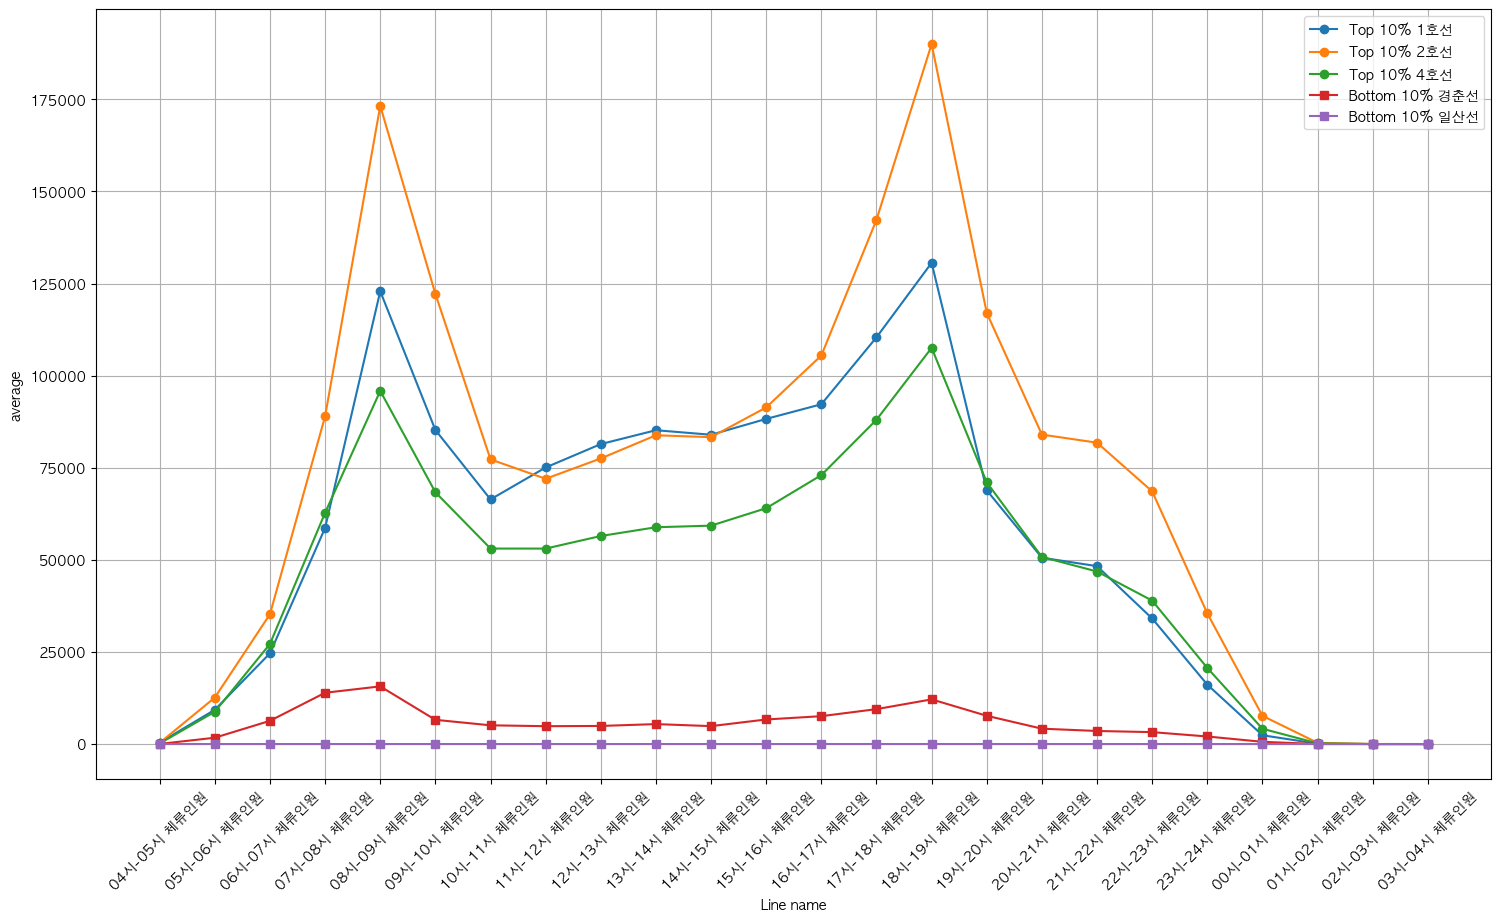

In [12]:
plt.figure(figsize=(18,10))

for line in top_10.index:
    plt.plot([col for col in top_10.columns if '체류인원' in col], 
             top_10.loc[line], marker='o', label=f'Top 10% {line}')

for line in bottom_10.index:
    plt.plot([col for col in bottom_10.columns if '체류인원' in col], 
             bottom_10.loc[line], marker='s', label=f'Bottom 10% {line}')


plt.xlabel('Line name')
plt.ylabel('average')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

In [13]:
df.head(1)

사용월    호선명      지하철역 행정구역  transfer_line  대합실면적  승강장면적  월일수  \
0  202111  우이신설선  4.19민주묘지  강북구            1.0    NaN    NaN   30   

   04시-05시 승차인원  04시-05시 하차인원  ...  18시-19시 체류인원  19시-20시 체류인원  20시-21시 체류인원  \
0             2             0  ...         11217          9453          5773   

   21시-22시 체류인원  22시-23시 체류인원  23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  \
0          4917          4159          2485            28             0   

   02시-03시 체류인원  03시-04시 체류인원  
0             0             0  

[1 rows x 81 columns]

In [35]:
# 주요 노선별 (1~9호선) 체류인원 평균

filter_lines = line_avg[line_avg.index.str.match(r'^[1-9]호선$')]
filter_lines

04시-05시 체류인원  05시-06시 체류인원  06시-07시 체류인원  07시-08시 체류인원   08시-09시 체류인원  \
line                                                                          
1호선     377.741667   9303.222222  24625.533333  58661.980556  122902.916667   
2호선     317.628157  12622.428030  35238.319444  88971.334596  173224.400253   
3호선      65.786765   5380.632353  20393.924020  50000.133987   81454.564542   
4호선     168.550214   8762.869658  27172.026709  62776.039530   95857.675214   
5호선      29.178419   5918.794872  17685.600962  47042.686432   75268.659722   
6호선      58.956553   5081.587607  12540.094017  31116.091880   49025.698006   
7호선      60.027064   8615.204330  21847.556157  52305.606901   87462.238160   
8호선      28.032828   6752.250000  19042.406566  47336.101010   82994.664141   
9호선      32.218889   5297.930000  16134.417778  43829.946667   66418.204444   

       09시-10시 체류인원  10시-11시 체류인원  11시-12시 체류인원  12시-13시 체류인원  13시-14시 체류인원  \
line                                                                          
1호선    85246.500000  66403.477778  75065.894444  81420.588889  85184.536111   
2호선   122202.588384  77254.926768  72001.881944  77517.227273  83813.234217   
3호선    58748.388072  43248.763072  41436.202614  43247.296569  45449.647059   
4호선    68349.808761  53062.996795  53053.706197  56468.195513  58845.876068   
5호선    40104.569444  27672.678953  27322.935363  29272.725427  30831.373397   
6호선    29866.939459  21578.901709  20845.193732  22613.970085  24036.891026   
7호선    57122.143437  35981.102842  32441.302436  34337.294317  35744.119080   
8호선    47173.330808  30793.851010  29484.489899  31528.578283  32969.340909   
9호선    38579.006667  26670.568889  26417.724444  28463.417778  30068.277778   

      ...   18시-19시 체류인원   19시-20시 체류인원  20시-21시 체류인원  21시-22시 체류인원  \
line  ...                                                             
1호선   ...  130623.480556   68870.586111  50576.958333  48286.752778   
2호선   ...  190005.578283  117018.107955  83995.377525  81799.708333   
3호선   ...   88197.211601   54225.139706  38604.820261  34018.302288   
4호선   ...  107541.482906   71022.138889  50780.899573  46833.927350   
5호선   ...   71775.848825   41748.151709  28518.347222  26378.748932   
6호선   ...   47964.272792   32245.500712  21612.715812  20623.930199   
7호선   ...   79491.503383   52358.177267  33854.566306  30584.067659   
8호선   ...   77412.648990   46032.131313  31630.898990  28052.169192   
9호선   ...   67323.825556   41540.650000  28855.386667  26667.603333   

      22시-23시 체류인원  23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  02시-03시 체류인원  \
line                                                                         
1호선   34080.738889  16125.380556   2385.902778     96.941667      2.461111   
2호선   68586.707071  35469.926768   7658.415404    328.952020      6.434343   
3호선   27109.700163  12270.030229   2543.738562     66.678922      1.485294   
4호선   38929.802350  20650.300214   4150.053419    190.835470      1.439103   
5호선   21545.266026  10917.689637   2636.275107     73.069979      2.356303   
6호선   18358.170940  10721.212963   2562.467236     24.963675      0.309829   
7호선   25153.652909  13570.742896   3432.025710     77.209743      0.244926   
8호선   22426.818182  10754.520202   2552.954545    119.055556      0.436869   
9호선   22397.703333  11563.402222   2473.398889     92.211111      0.605556   

      03시-04시 체류인원  
line                
1호선       0.000000  
2호선       0.648359  
3호선       0.260621  
4호선       0.023504  
5호선       0.107906  
6호선       0.004274  
7호선       0.000000  
8호선       0.000000  
9호선       0.030000  

[9 rows x 24 columns]

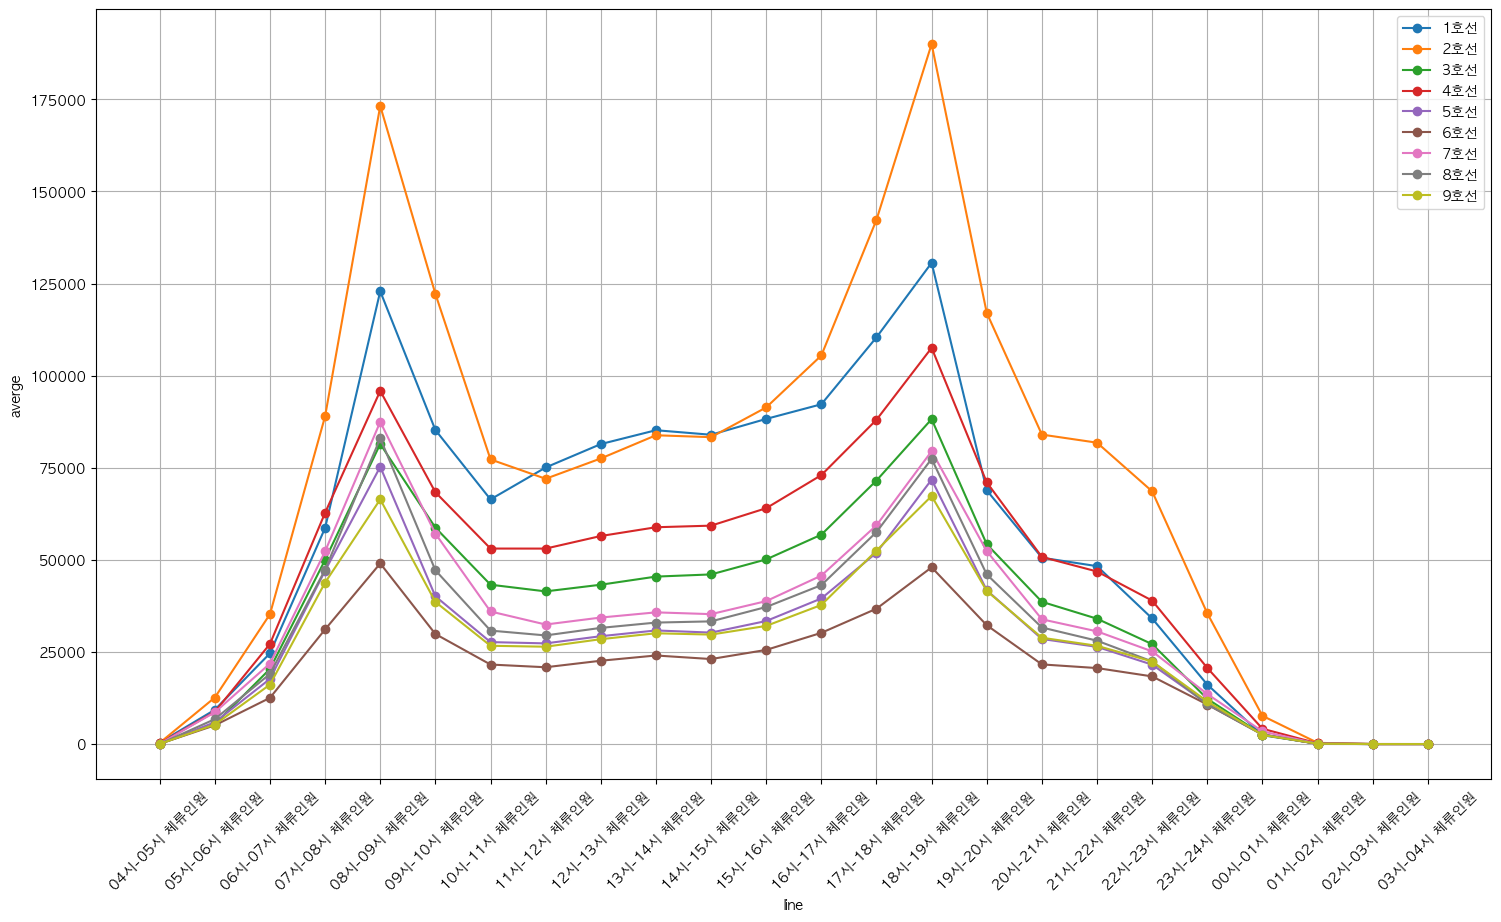

In [ ]:
# 주요 노선별 (1~9호선) 체류인원 변화 line graph

plt.figure(figsize=(18,10))

for line in filter_lines.index:
    plt.plot([col for col in filter_lines.columns if '체류인원' in col], filter_lines.loc[line], marker='o', label=str(line))

plt.xlabel('line')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

In [38]:
# 나머지 노선별 (1~9호선 제외) 체류인원 평균

filter_lines_2 = line_avg[~line_avg.index.str.match(r'^[1-9]호선$')]
filter_lines_2.head(2)

04시-05시 체류인원  05시-06시 체류인원  06시-07시 체류인원  07시-08시 체류인원  \
line                                                               
9호선2~3단계      3.307692   2621.844017  10337.299145  25240.705128   
경부선         613.726852   7017.449074  16774.763889  44449.421296   

          08시-09시 체류인원  09시-10시 체류인원  10시-11시 체류인원  11시-12시 체류인원  \
line                                                               
9호선2~3단계  48257.271368  34485.416667   21249.57265  19116.102564   
경부선       82547.675926  53308.064815   35835.49537  36309.953704   

          12시-13시 체류인원  13시-14시 체류인원  ...  18시-19시 체류인원  19시-20시 체류인원  \
line                                  ...                               
9호선2~3단계  20531.634615  21873.920940  ...  48352.987179  29199.284188   
경부선       38008.300926  40734.467593  ...  90007.166667  53050.680556   

          20시-21시 체류인원  21시-22시 체류인원  22시-23시 체류인원  23시-24시 체류인원  \
line                                                               
9호선2~3단계  19618.192308  18738.314103  14940.094017   6858.044872   
경부선       41241.000000  38719.092593  27416.222222  12145.703704   

          00시-01시 체류인원  01시-02시 체류인원  02시-03시 체류인원  03시-04시 체류인원  
line                                                              
9호선2~3단계   1524.961538     51.803419      0.220085      0.000000  
경부선        1356.902778      2.703704      0.111111      0.009259  

[2 rows x 24 columns]

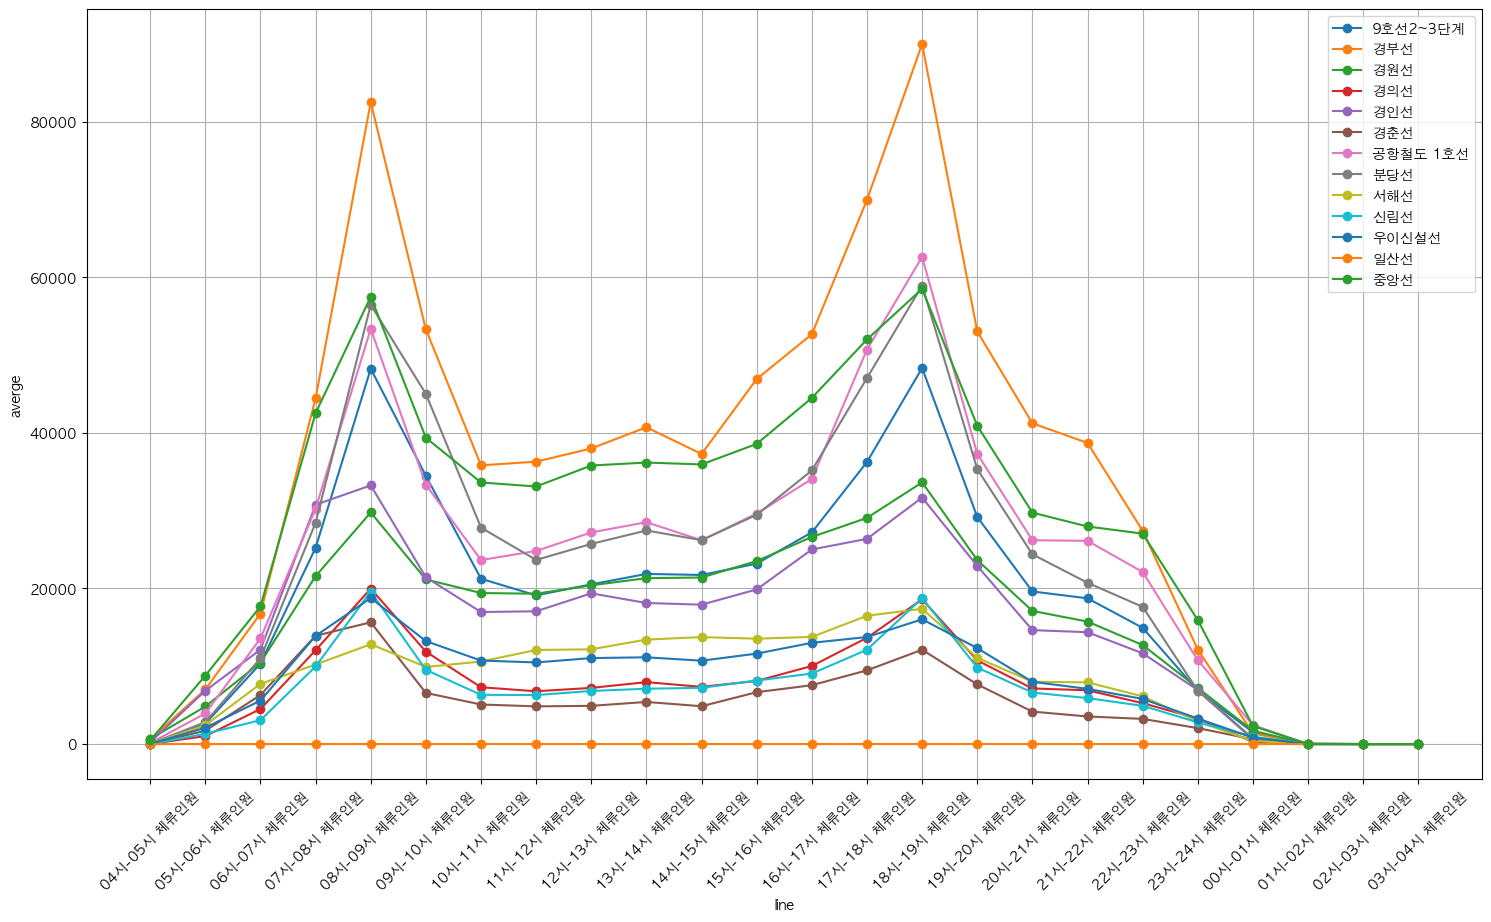

In [39]:
# 나머지 노선별 (1~9호선 제외) 체류인원 변화 line graph

plt.figure(figsize=(18,10))

for line in filter_lines_2.index:
    plt.plot([col for col in filter_lines_2.columns if '체류인원' in col], filter_lines_2.loc[line], marker='o', label=str(line))

plt.xlabel('line')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

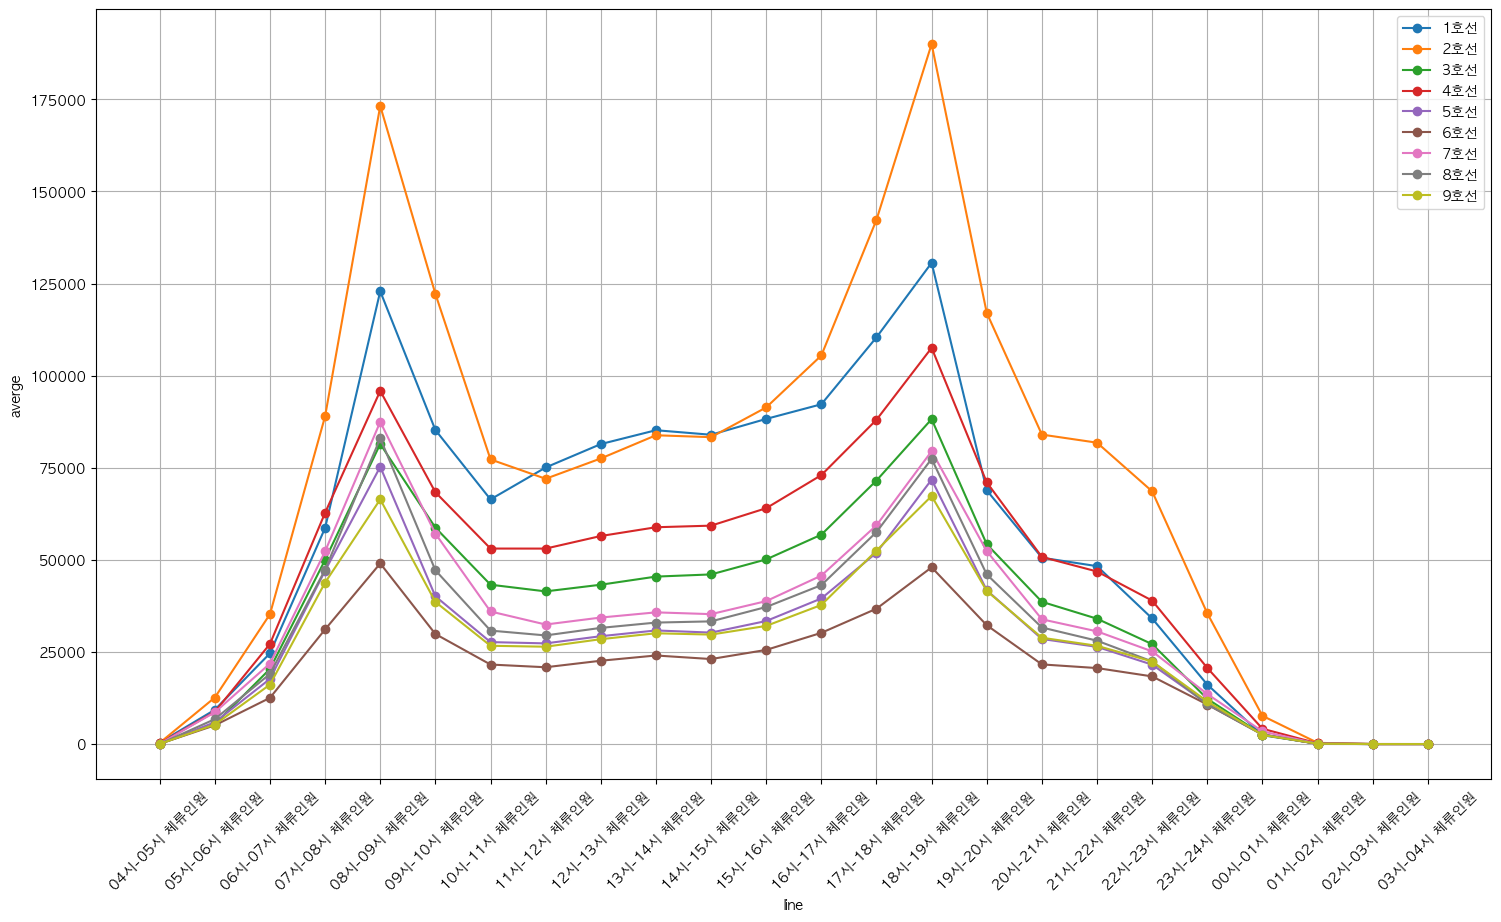

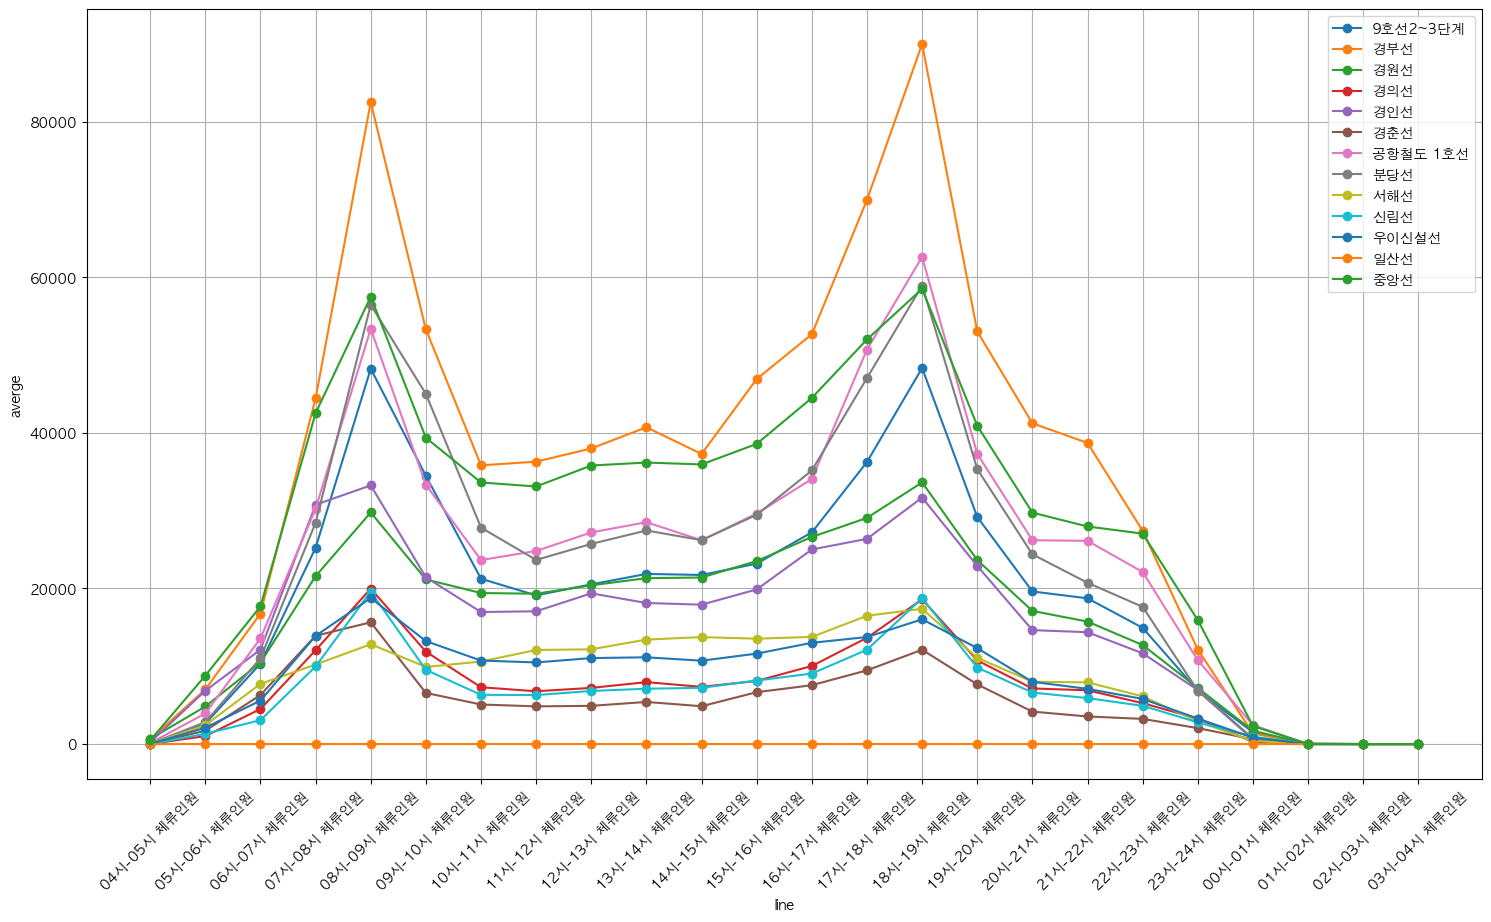

In [42]:
plt.figure(figsize=(18,10))

for line in filter_lines.index:
    plt.plot([col for col in filter_lines.columns if '체류인원' in col], filter_lines.loc[line], marker='o', label=str(line))

plt.xlabel('line')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

plt.figure(figsize=(18,10))

for line in filter_lines_2.index:
    plt.plot([col for col in filter_lines_2.columns if '체류인원' in col], filter_lines_2.loc[line], marker='o', label=str(line))

plt.xlabel('line')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

### Analyze note
- 서울 주요 노선 (1~9호선)의 이용 패턴에 비해 나머지 노선도 (시외에서 들어오는 노선들)의 경우
    주요 노선의 평균 값 정도의 최대값을 보이고 있음
- 수도권 > 서울 로의 이동보다 서울 > 서울 의 이동이 더 많음을 짐작할 수 있음

In [24]:
df['호선명'].unique()

array(['우이신설선', '3호선', '8호선', '7호선', '경부선', '9호선', '경의선', '2호선', '분당선',
       '5호선', '6호선', '공항철도 1호선', '경원선', '4호선', '서해선', '1호선', '9호선2~3단계',
       '중앙선', '신림선', '경춘선', '경인선', '일산선'], dtype=object)

In [25]:
df.head(2)

사용월    호선명      지하철역 행정구역  transfer_line  대합실면적  승강장면적  월일수  \
0  202111  우이신설선  4.19민주묘지  강북구            1.0    NaN    NaN   30   
1  202112  우이신설선  4.19민주묘지  강북구            1.0    NaN    NaN   31   

   04시-05시 승차인원  04시-05시 하차인원  ...  18시-19시 체류인원  19시-20시 체류인원  20시-21시 체류인원  \
0             2             0  ...         11217          9453          5773   
1             0             1  ...         10614          8862          5897   

   21시-22시 체류인원  22시-23시 체류인원  23시-24시 체류인원  00시-01시 체류인원  01시-02시 체류인원  \
0          4917          4159          2485            28             0   
1          5278          3839          1983             0             0   

   02시-03시 체류인원  03시-04시 체류인원  
0             0             0  
1             0             0  

[2 rows x 81 columns]

In [42]:
time_cols = [col for col in df.columns if '체류인원' in col]

line_average = df.groupby(['호선명', '지하철역'])[time_cols].mean().reset_index()
line_average.head(2)

호선명 지하철역  04시-05시 체류인원  05시-06시 체류인원  06시-07시 체류인원  07시-08시 체류인원  \
0  1호선  동대문    742.111111  13097.277778  15456.194444  25615.805556   
1  1호선  동묘앞    188.166667   3787.805556   8221.138889  15805.416667   

   08시-09시 체류인원  09시-10시 체류인원  10시-11시 체류인원  11시-12시 체류인원  ...  18시-19시 체류인원  \
0  39792.250000  39959.444444      39386.50  43820.111111  ...  44186.666667   
1  31123.138889  26995.777778      32381.75  44015.000000  ...  32044.194444   

   19시-20시 체류인원  20시-21시 체류인원  21시-22시 체류인원  22시-23시 체류인원  23시-24시 체류인원  \
0  36322.750000  28101.833333  25530.972222  21356.777778  13246.333333   
1  17708.916667  11545.166667  10669.055556   9512.944444   5147.916667   

   00시-01시 체류인원  01시-02시 체류인원  02시-03시 체류인원  03시-04시 체류인원  
0   2737.888889    184.444444      2.638889           0.0  
1   1850.555556    237.194444      9.250000           0.0  

[2 rows x 26 columns]

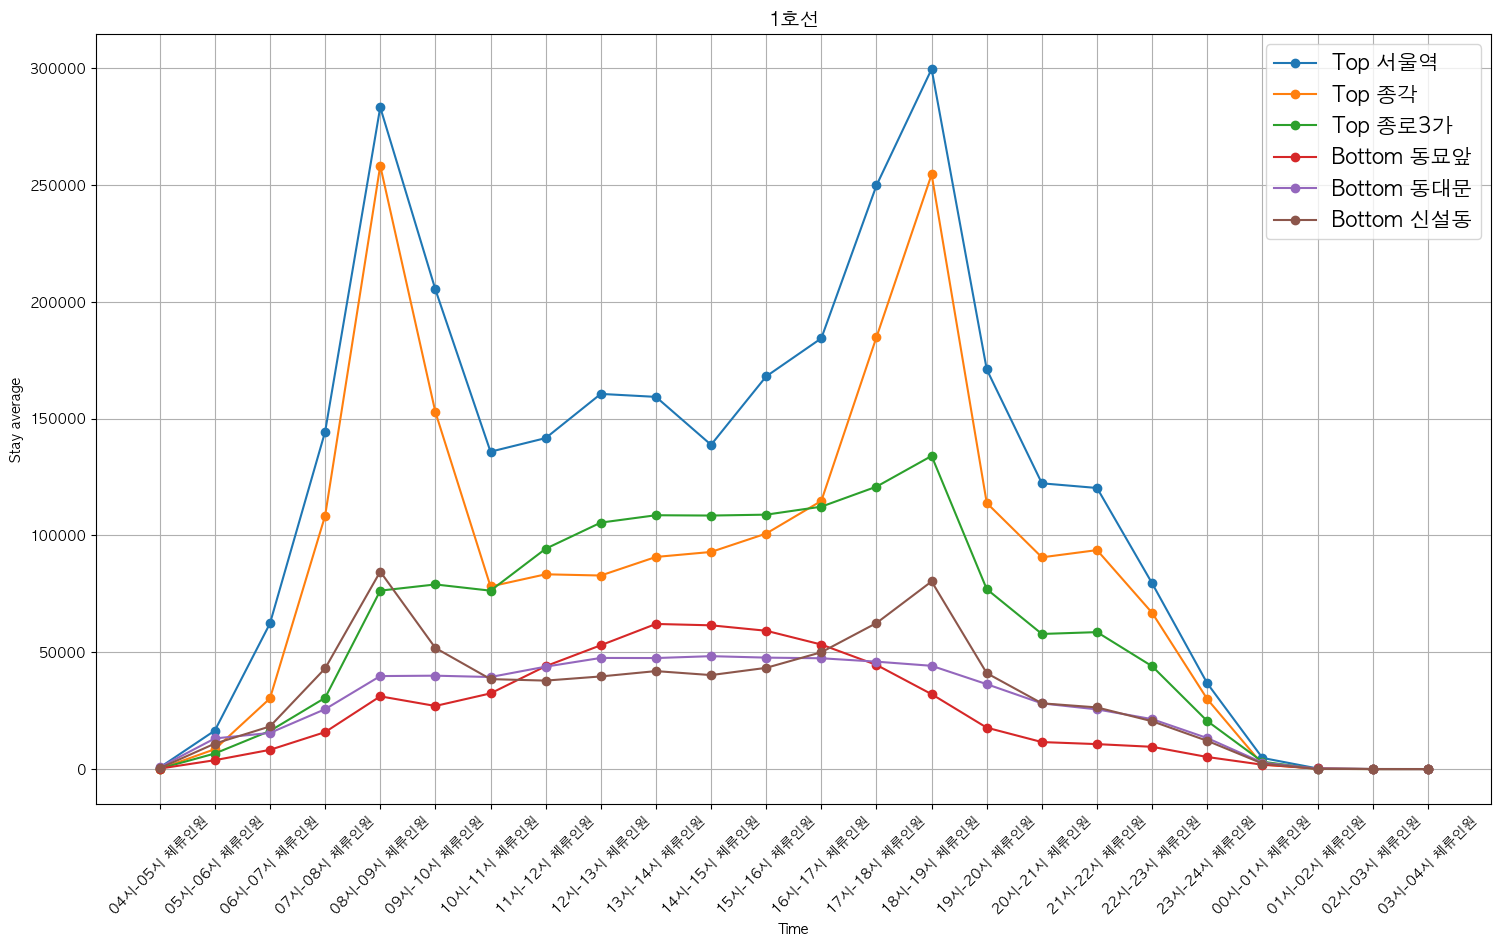

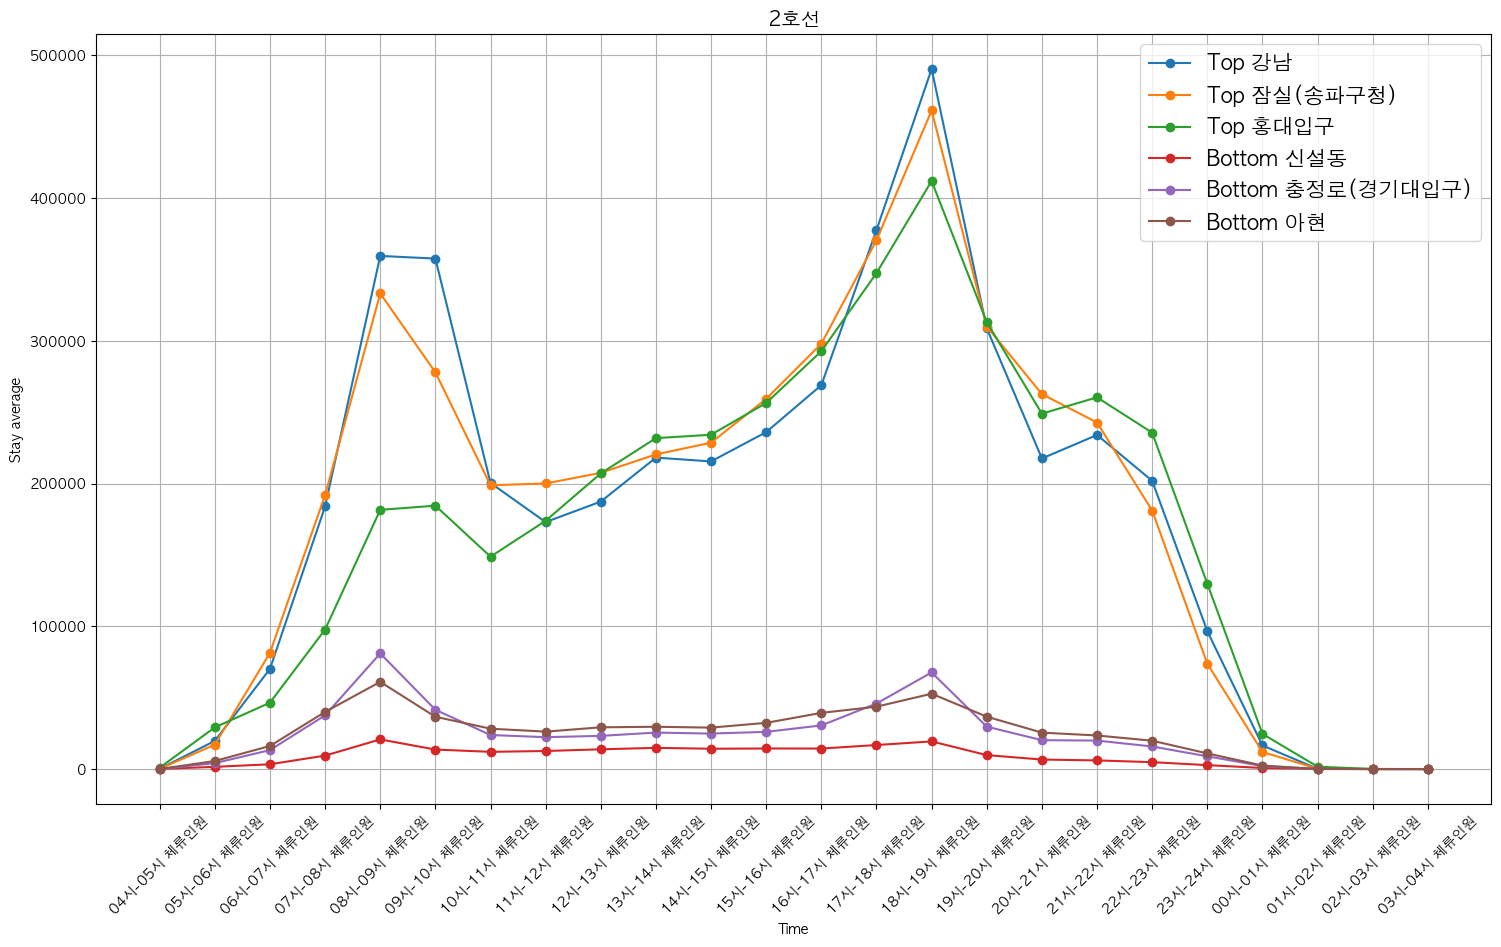

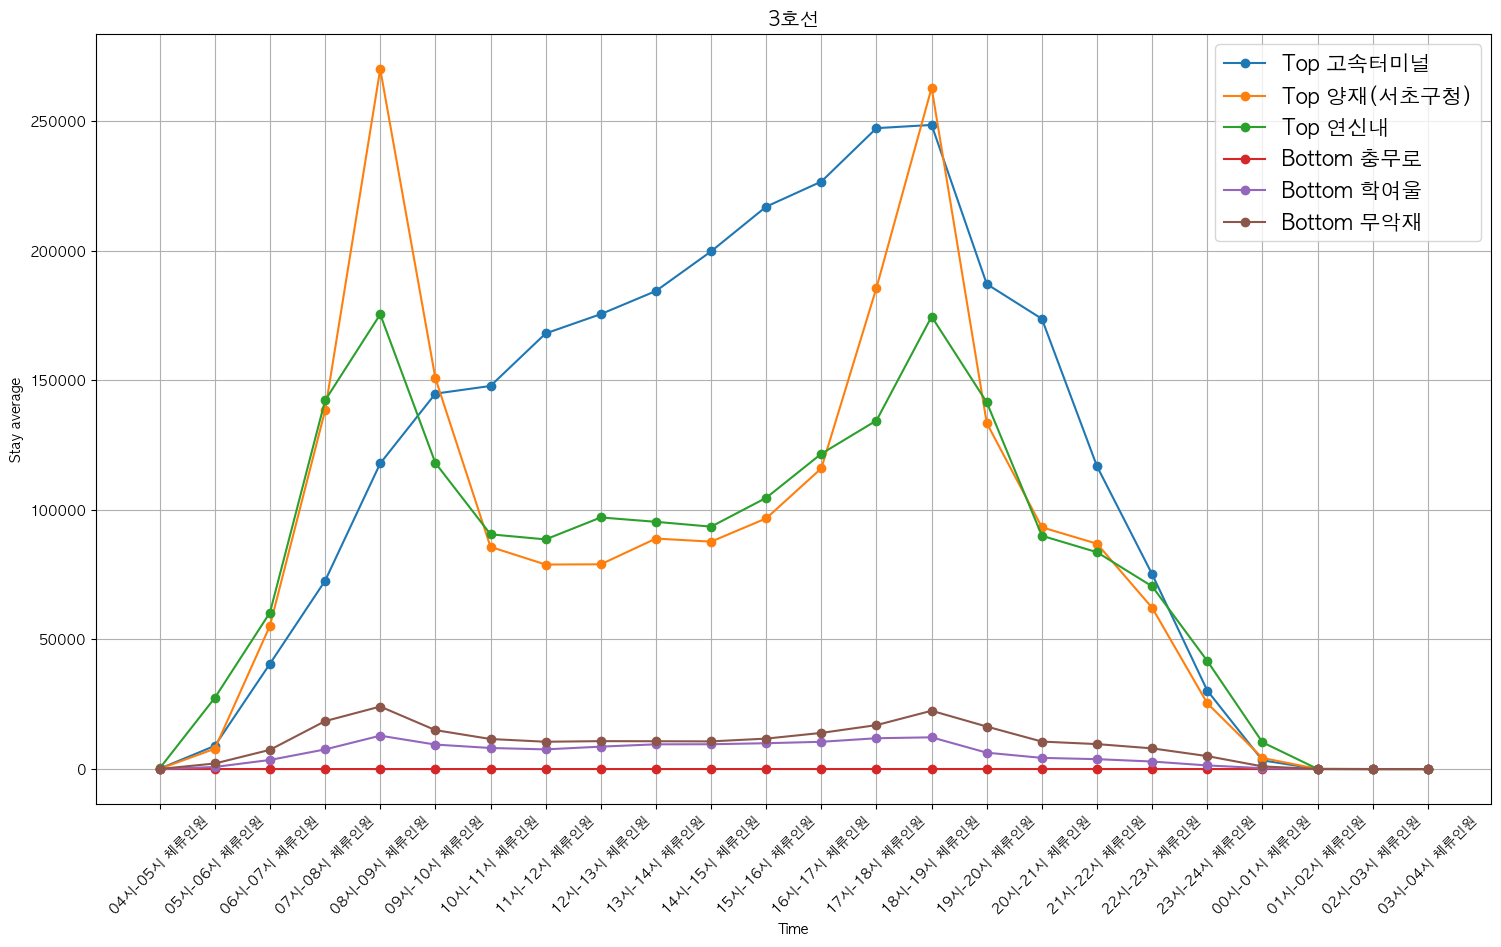

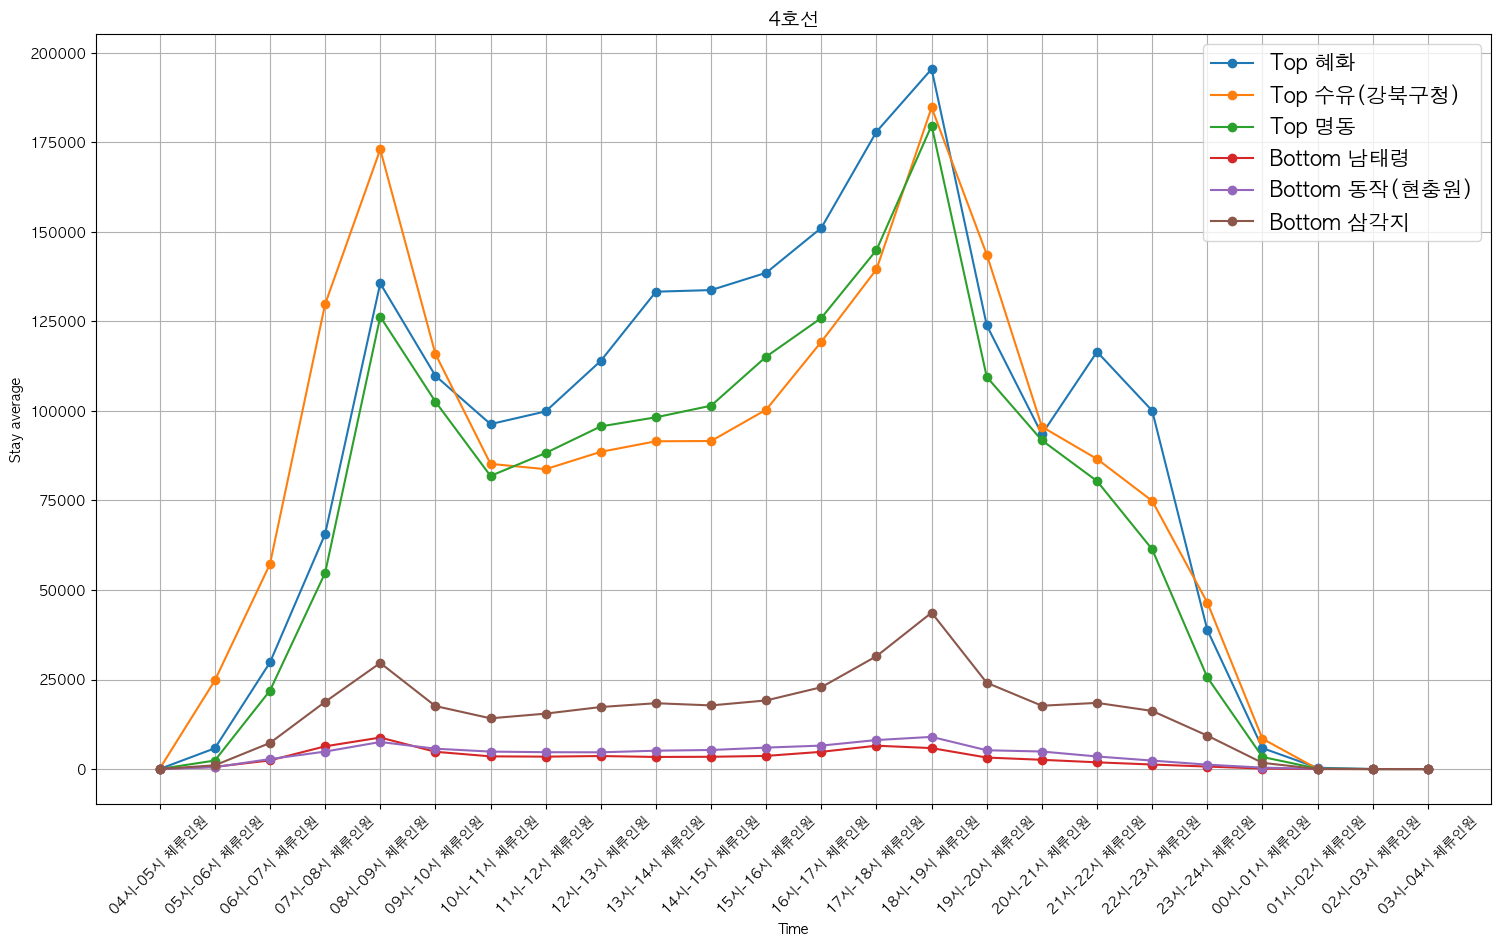

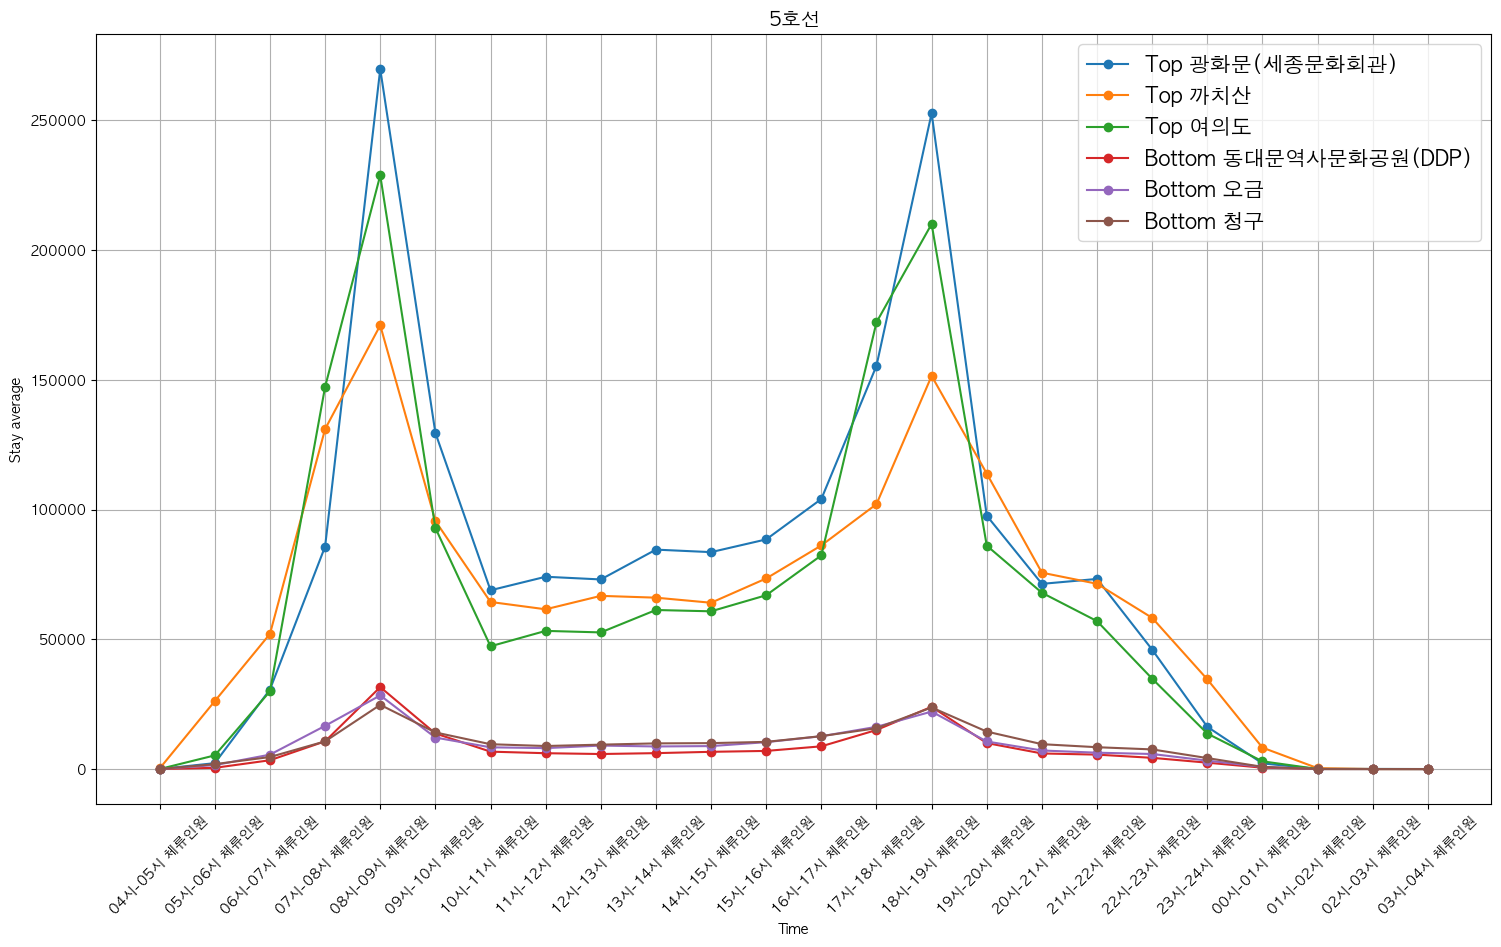

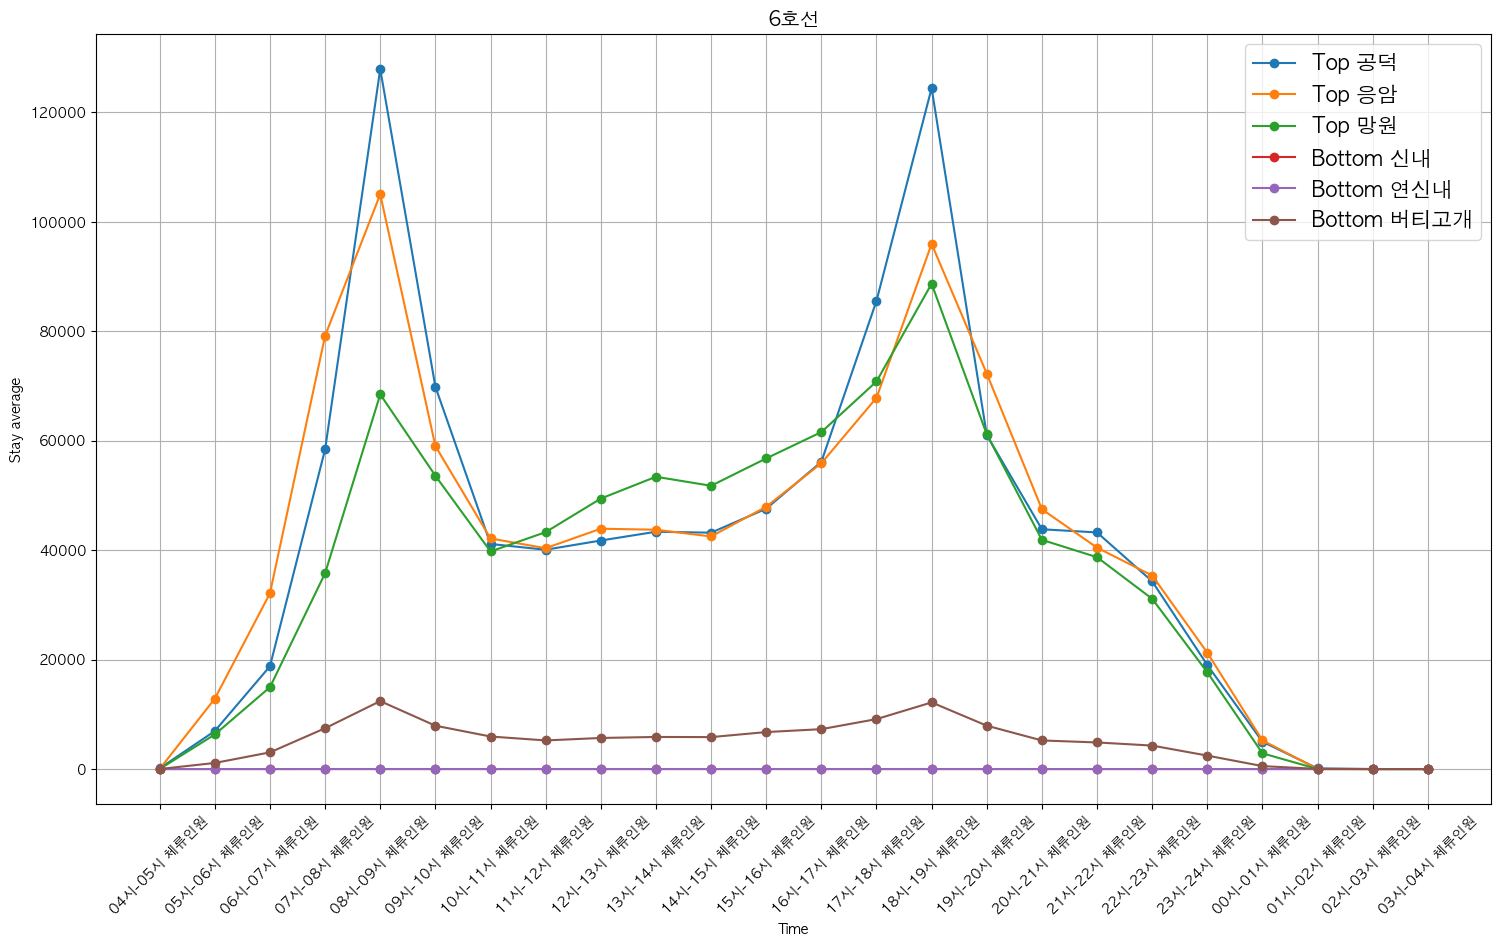

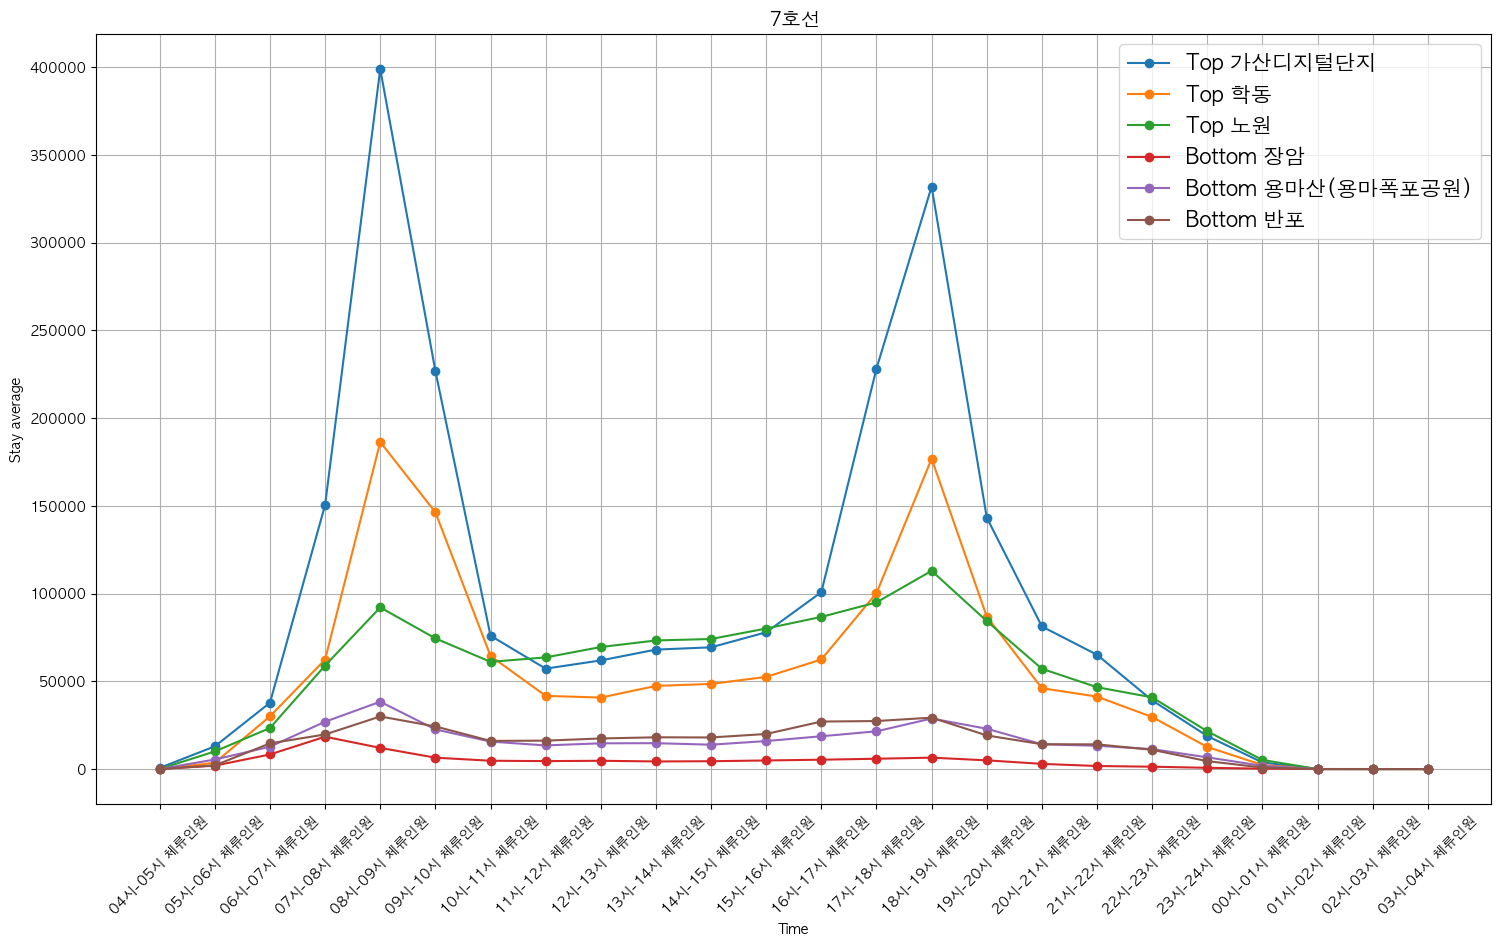

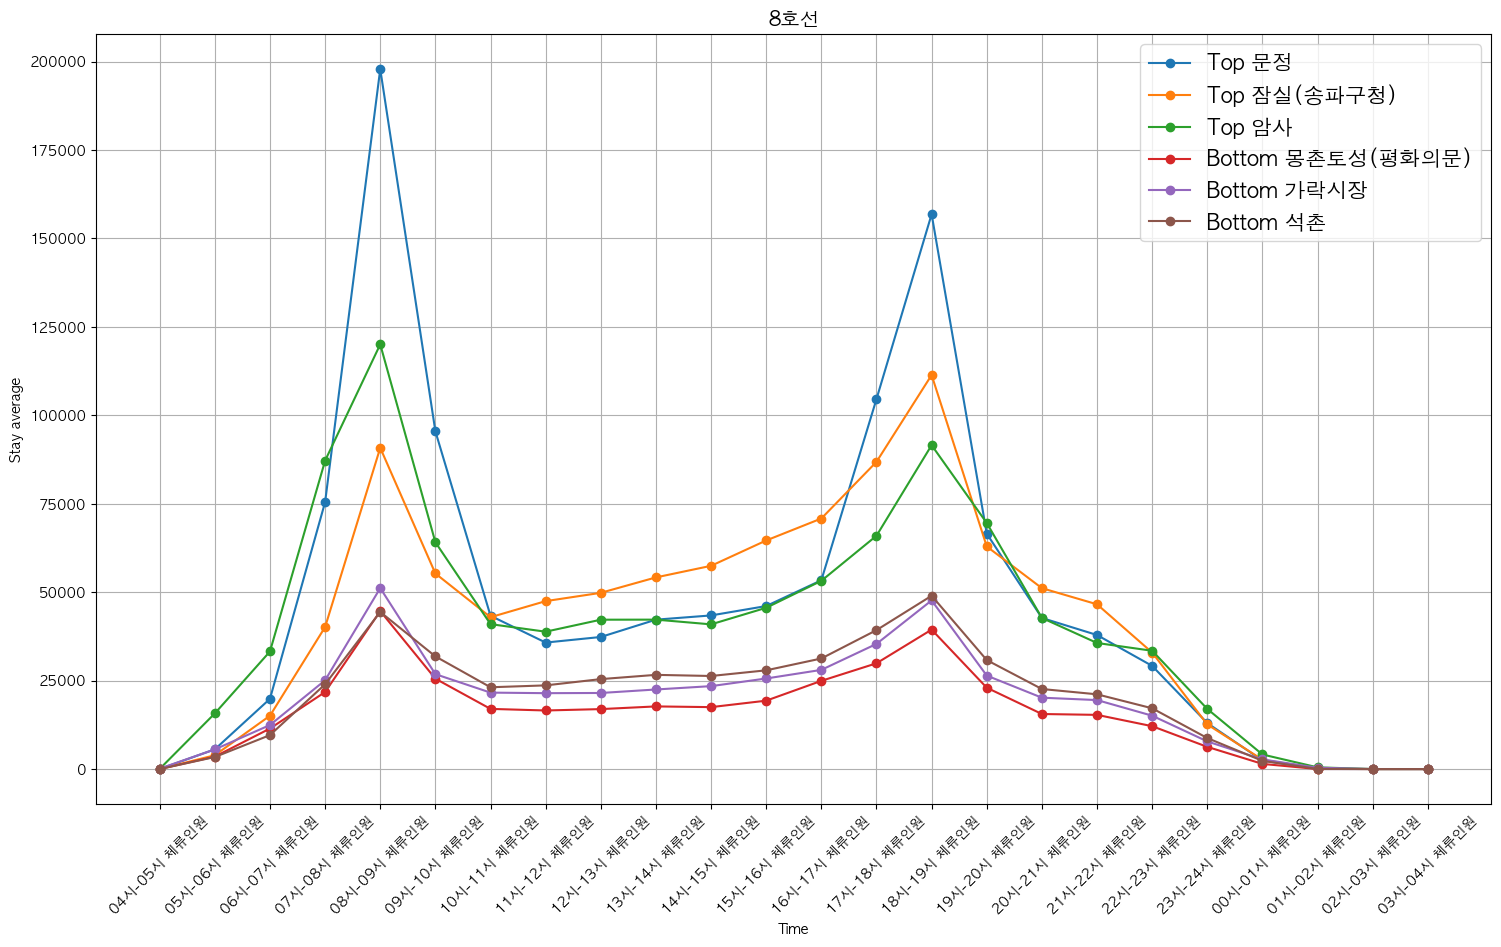

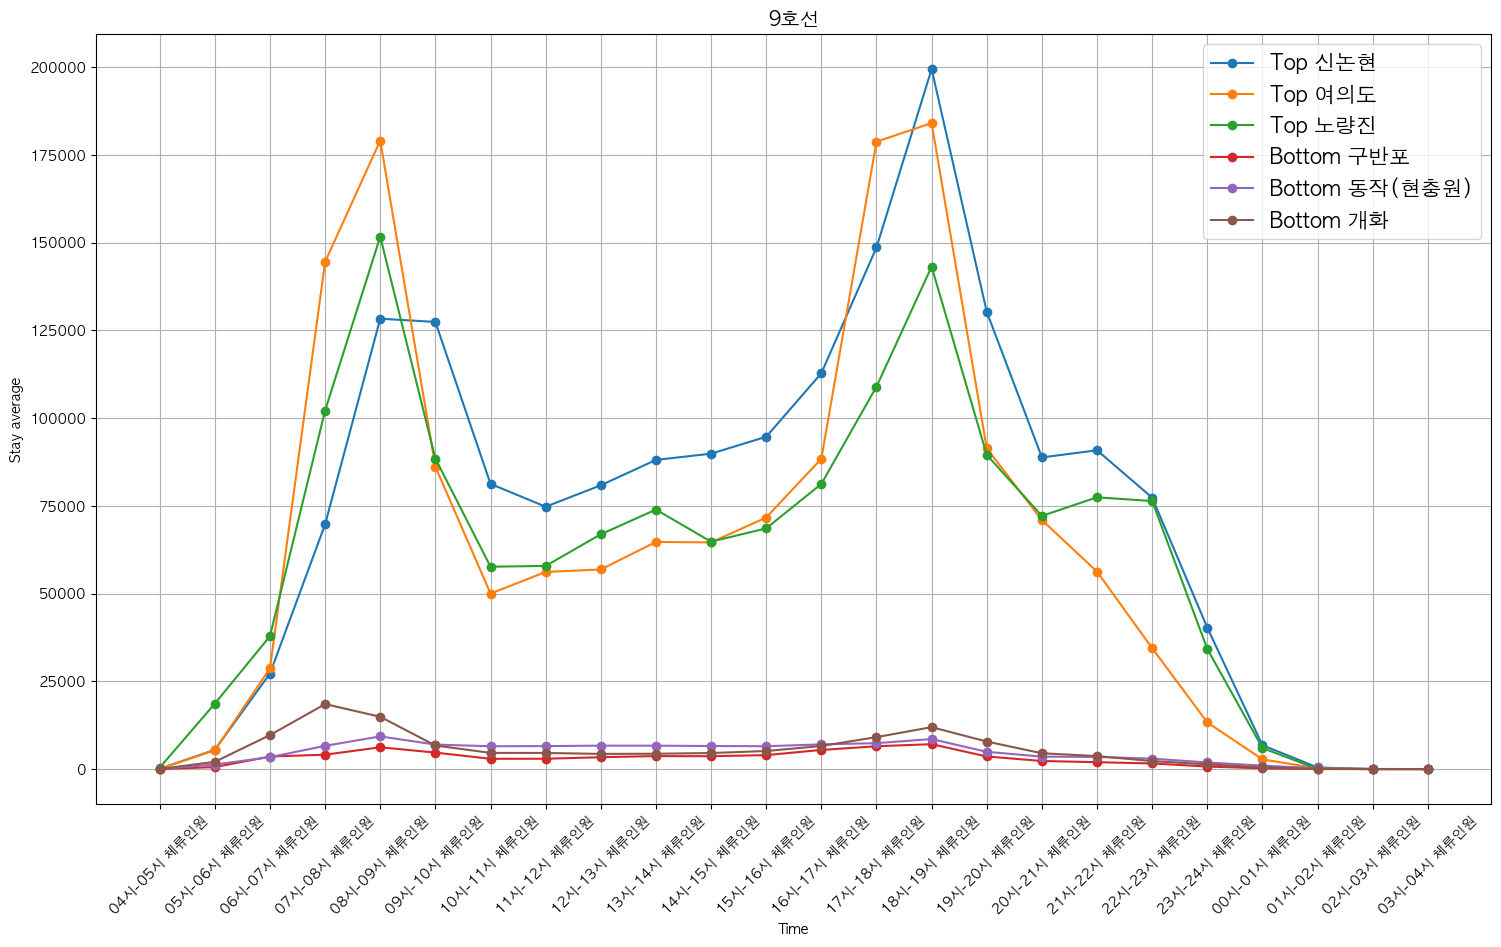

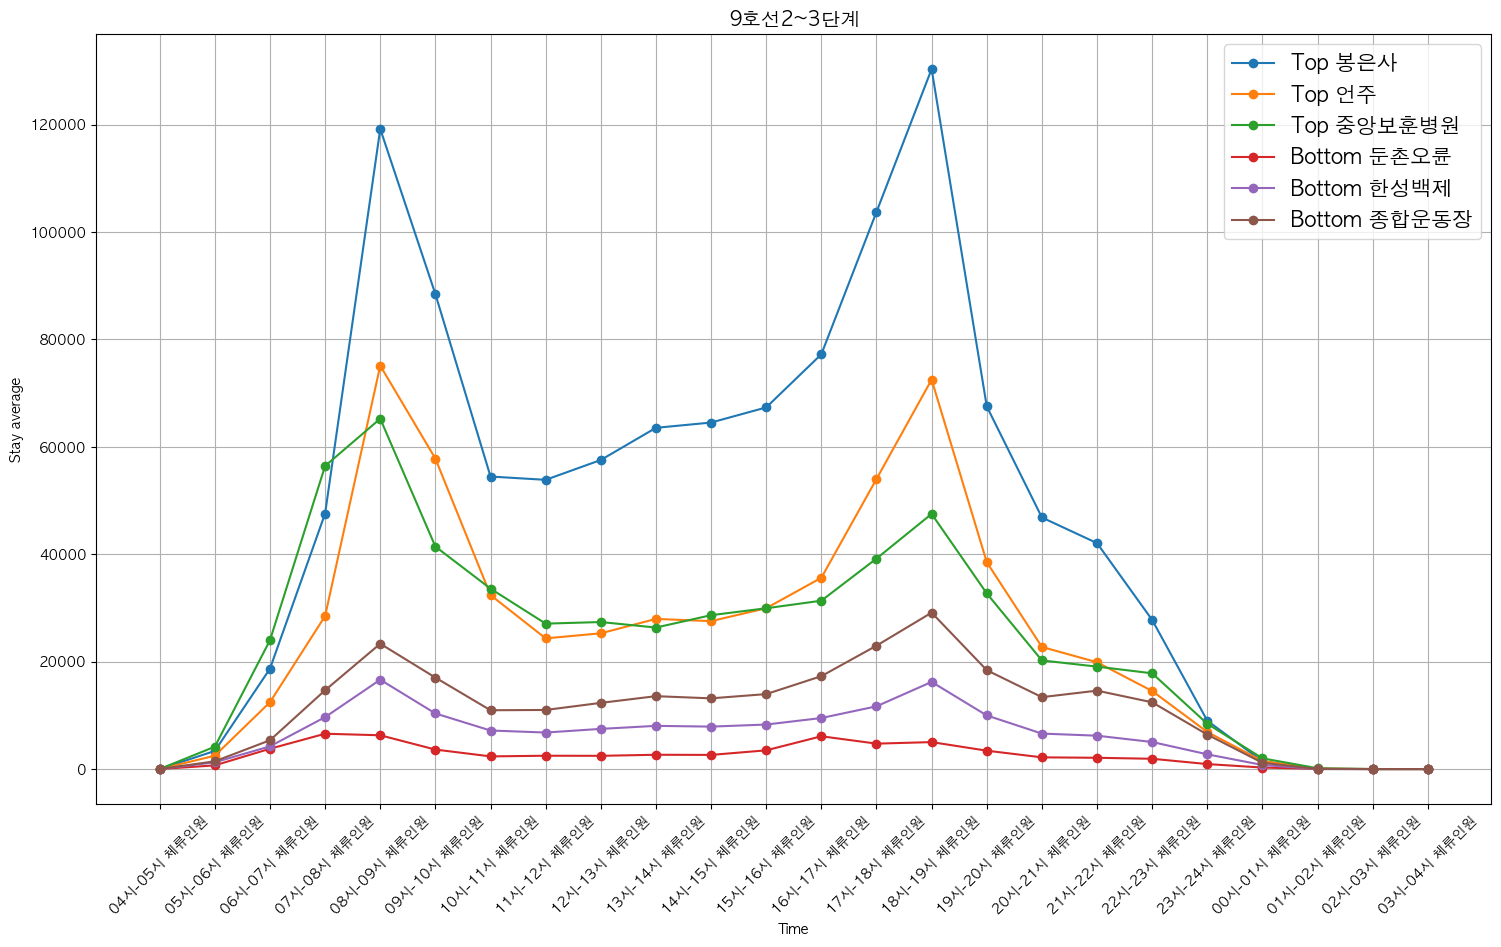

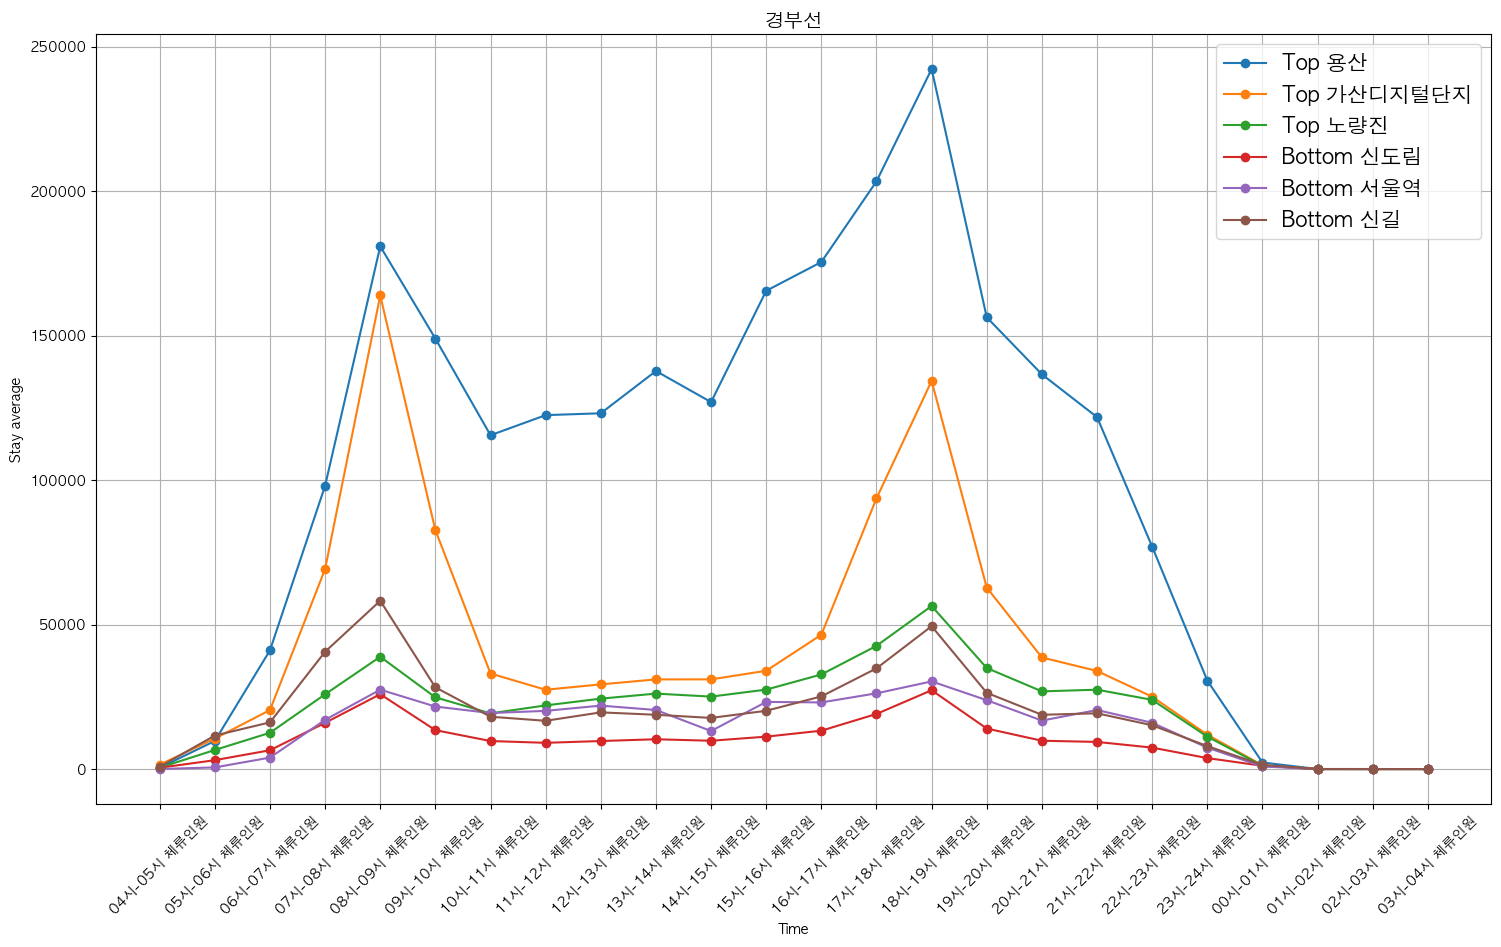

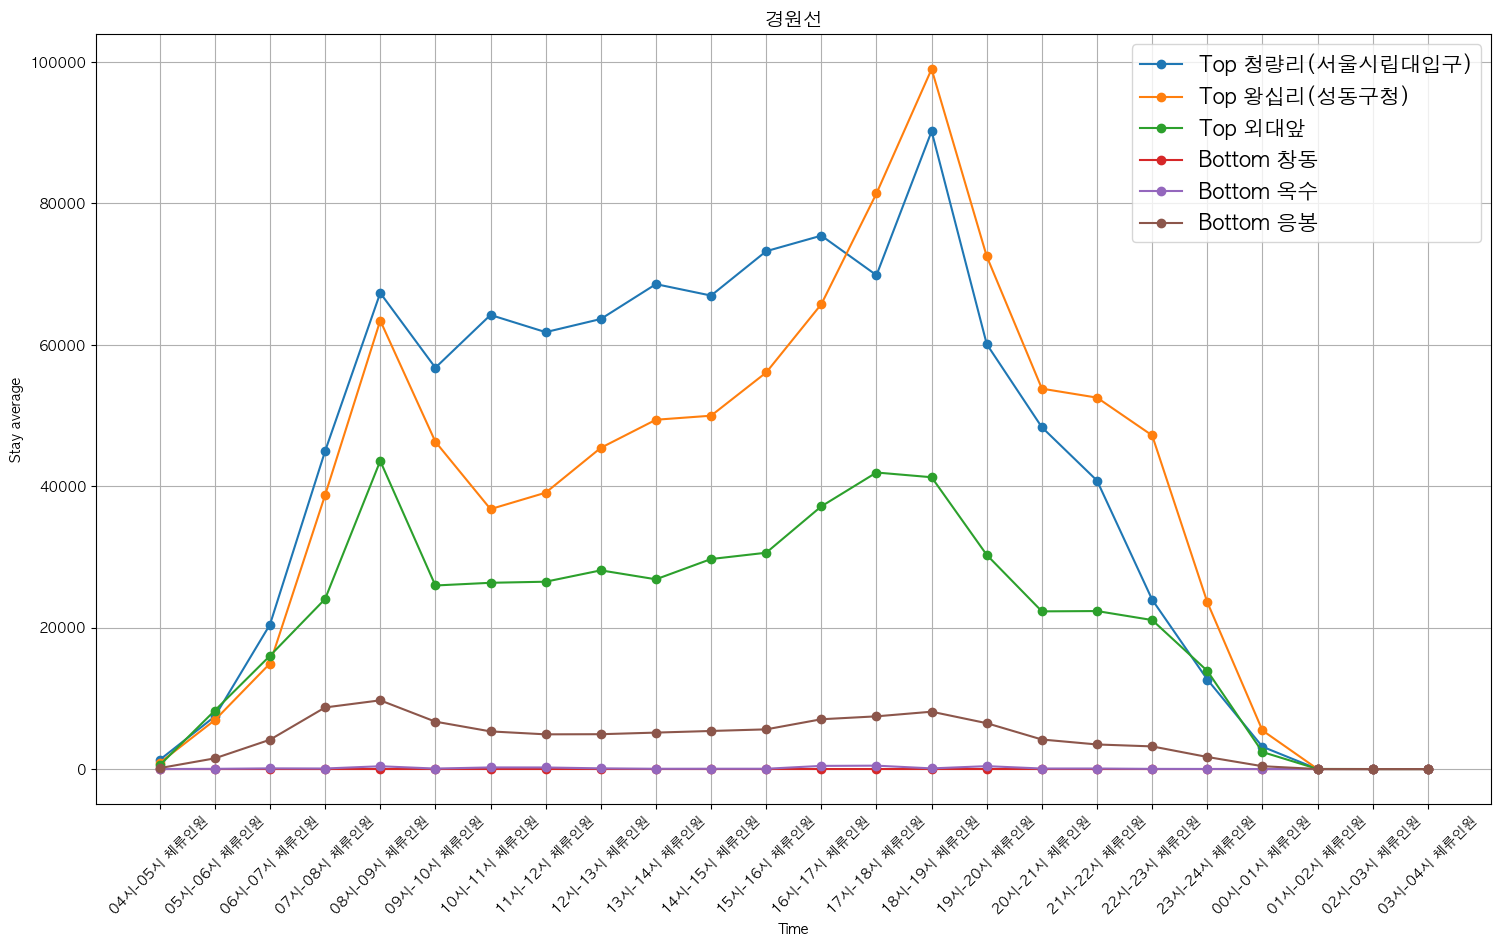

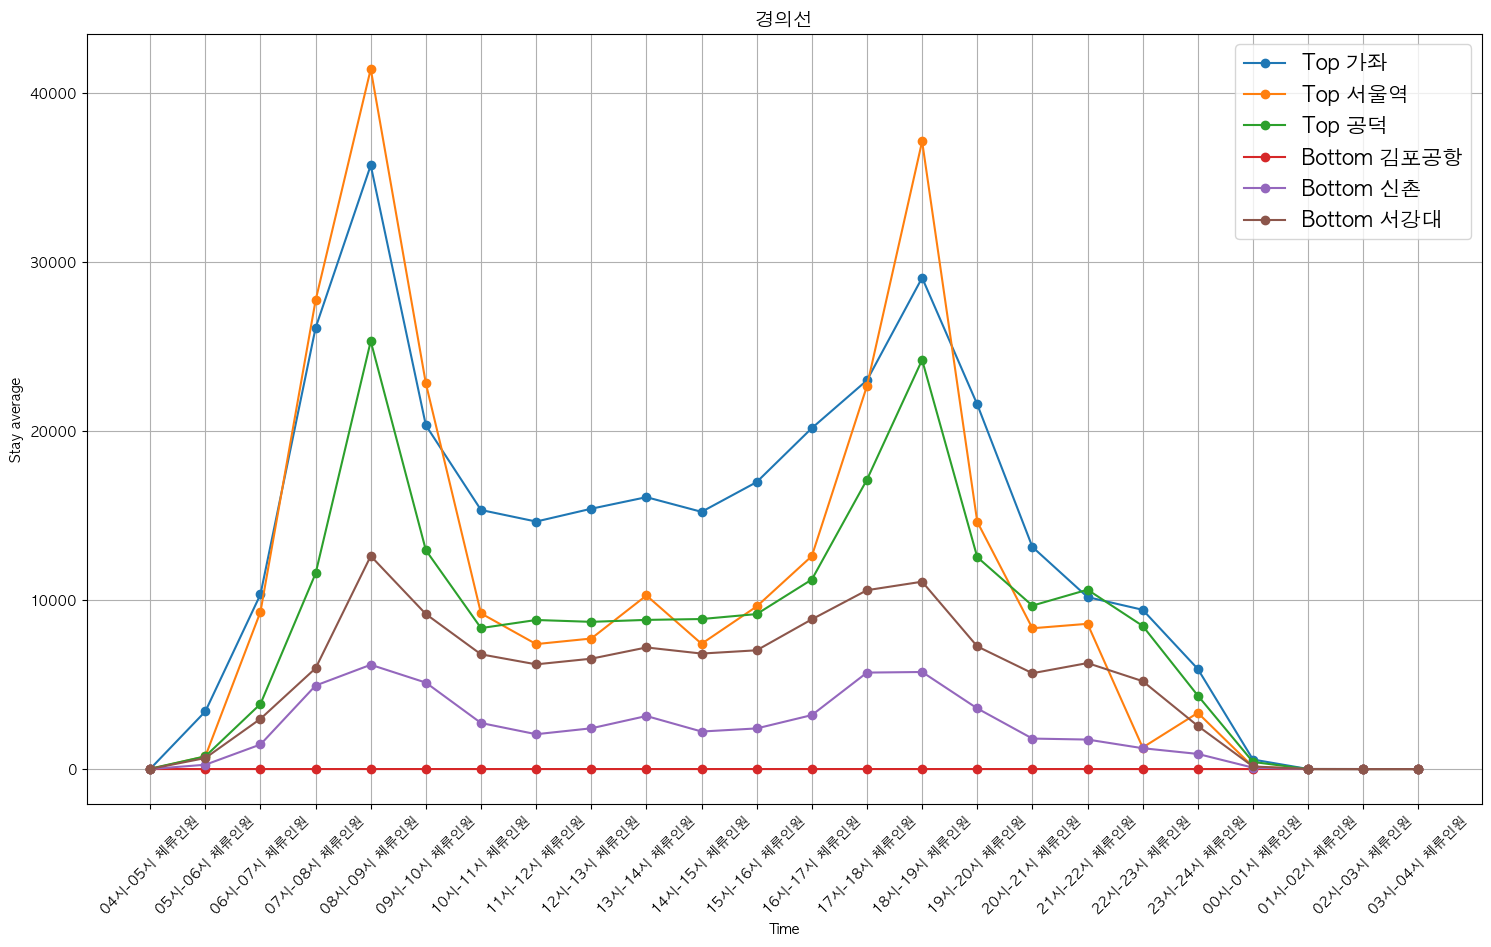

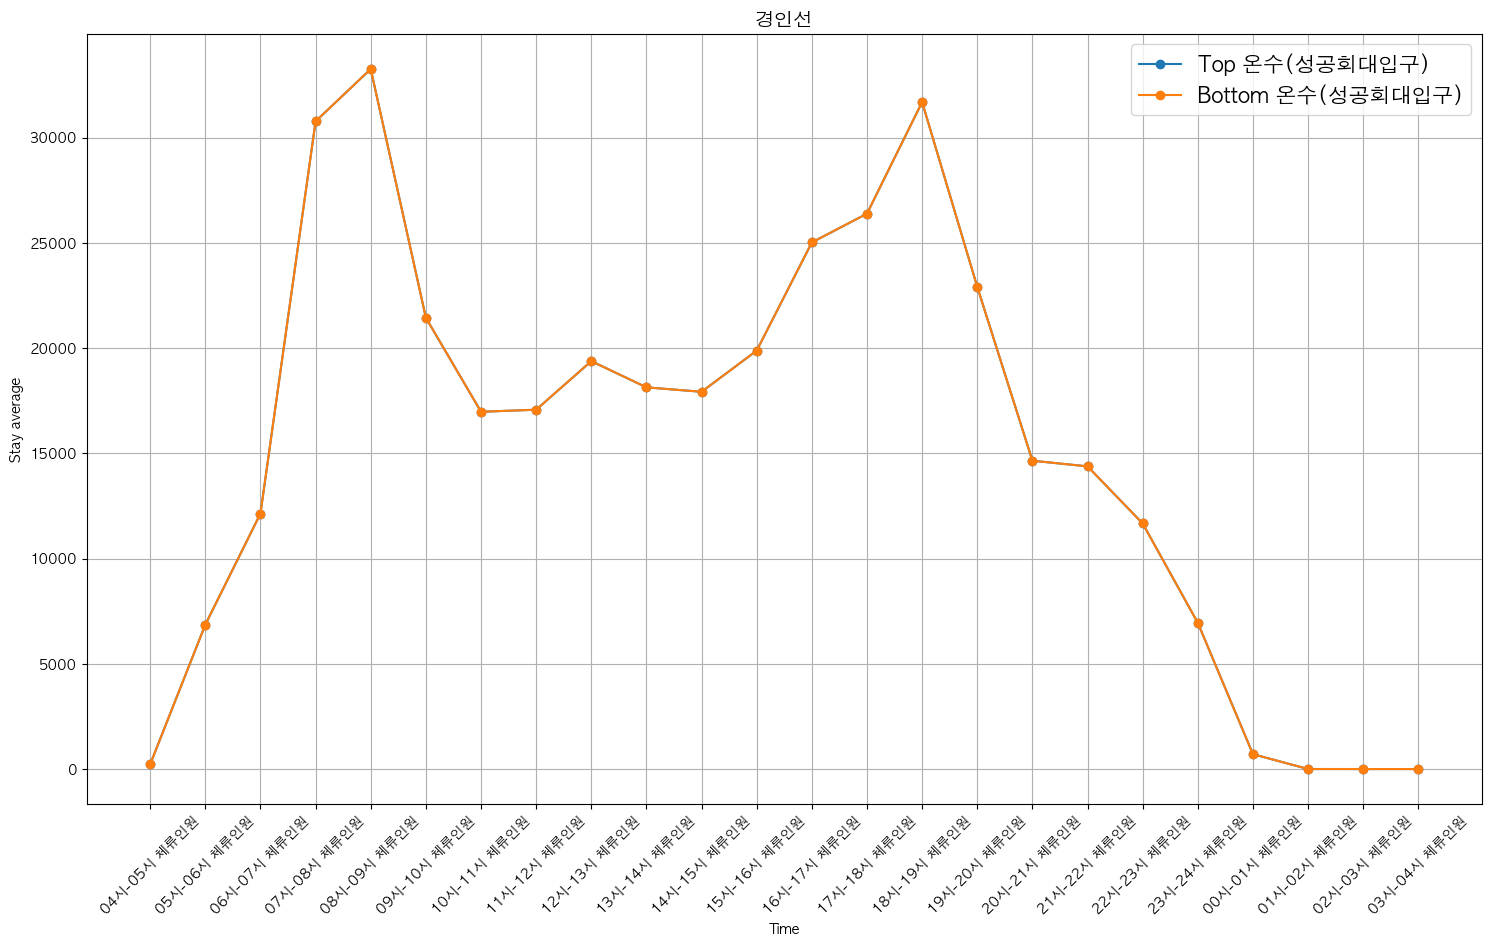

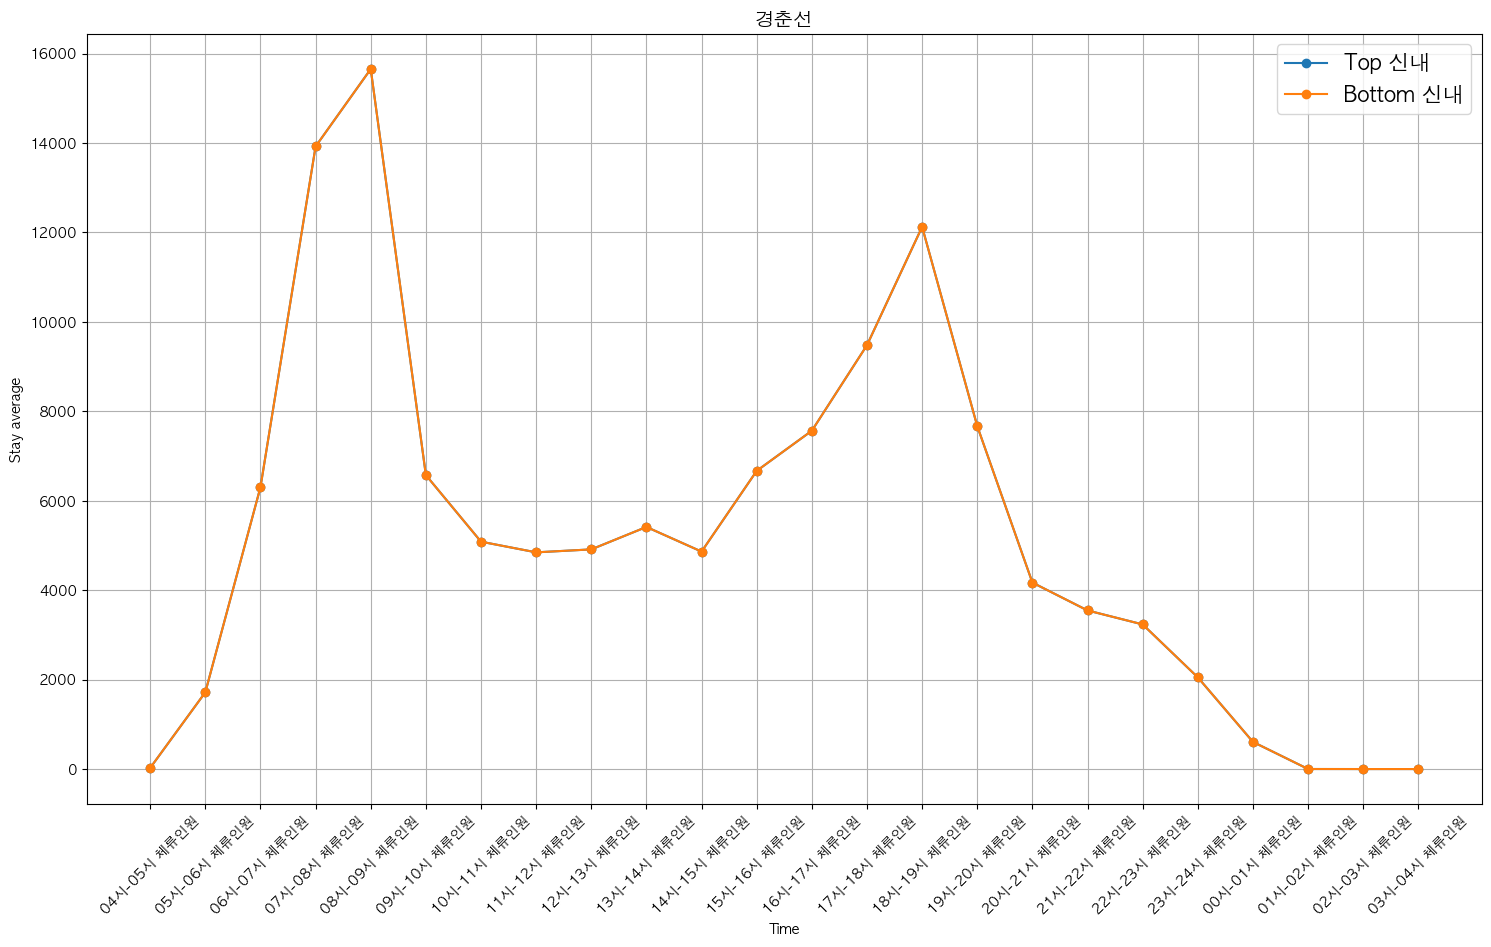

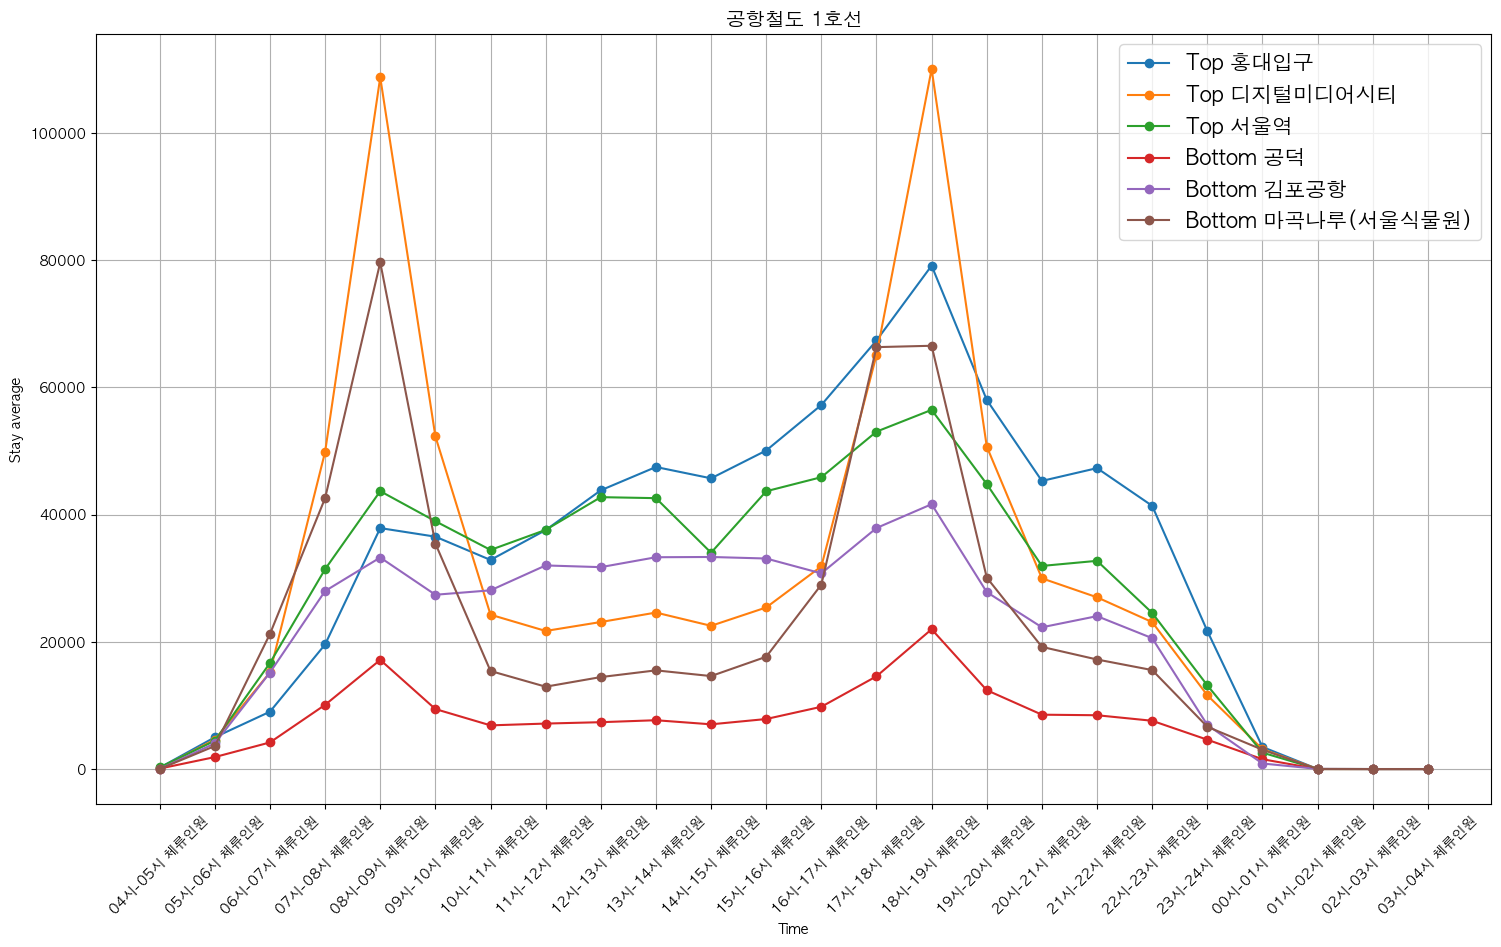

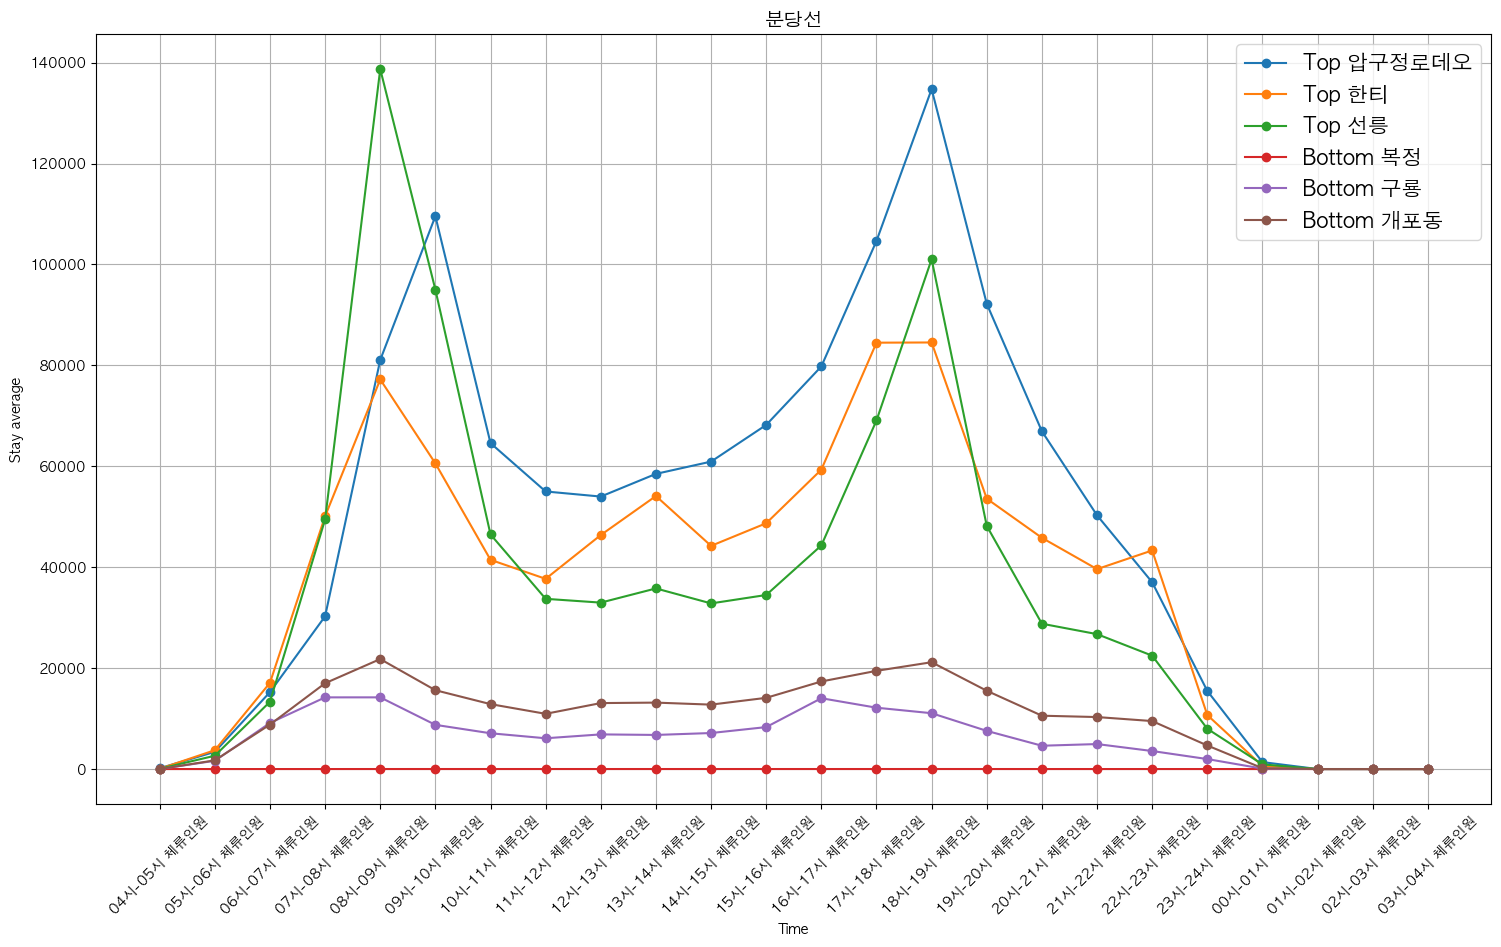

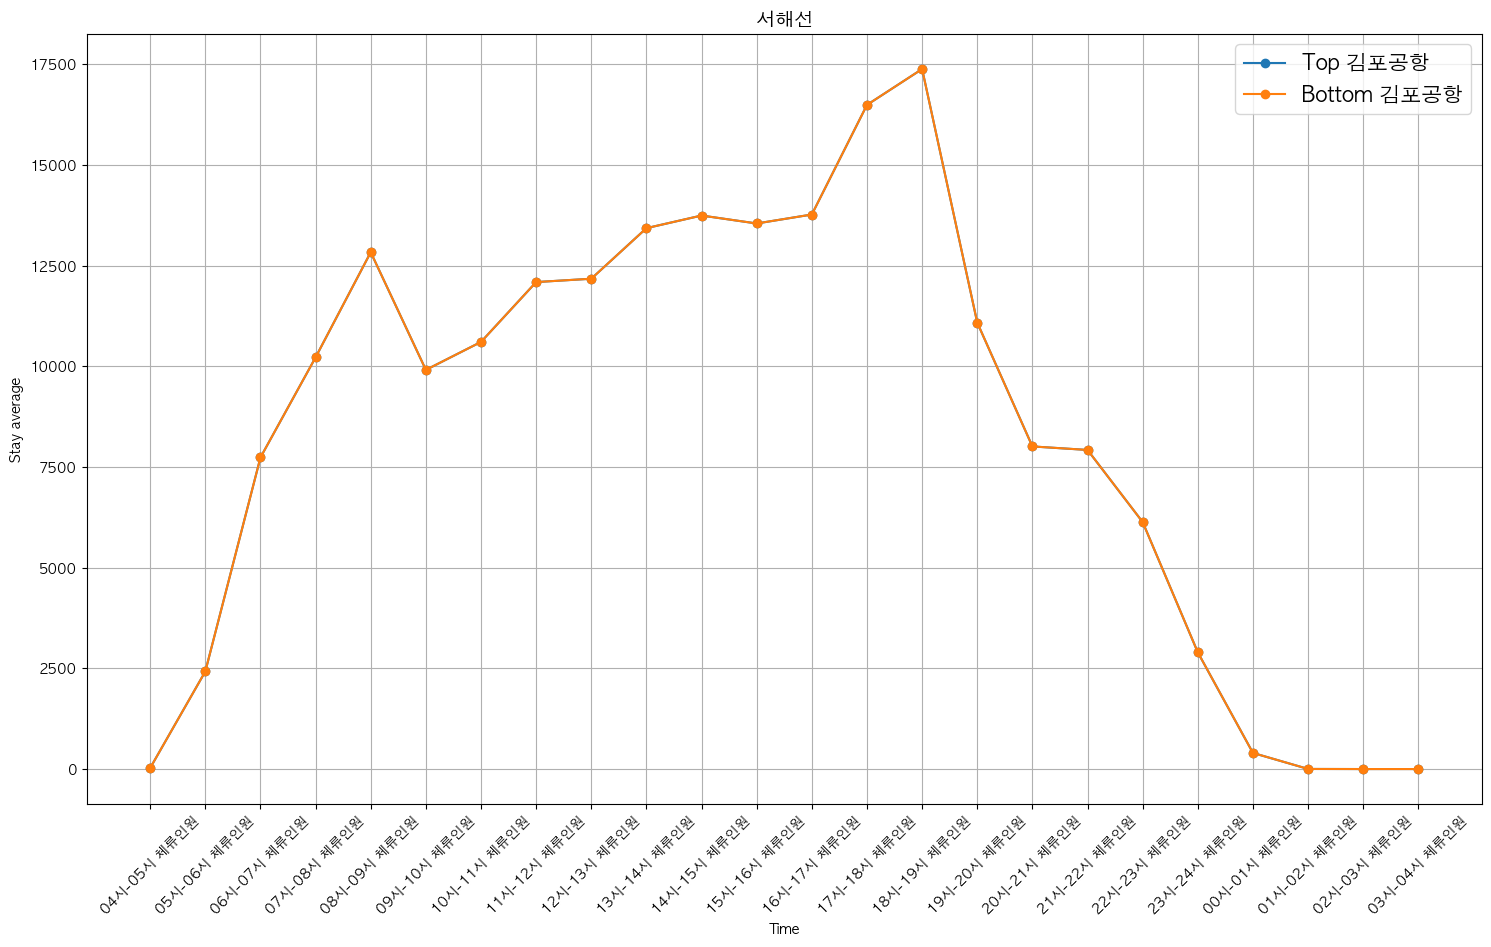

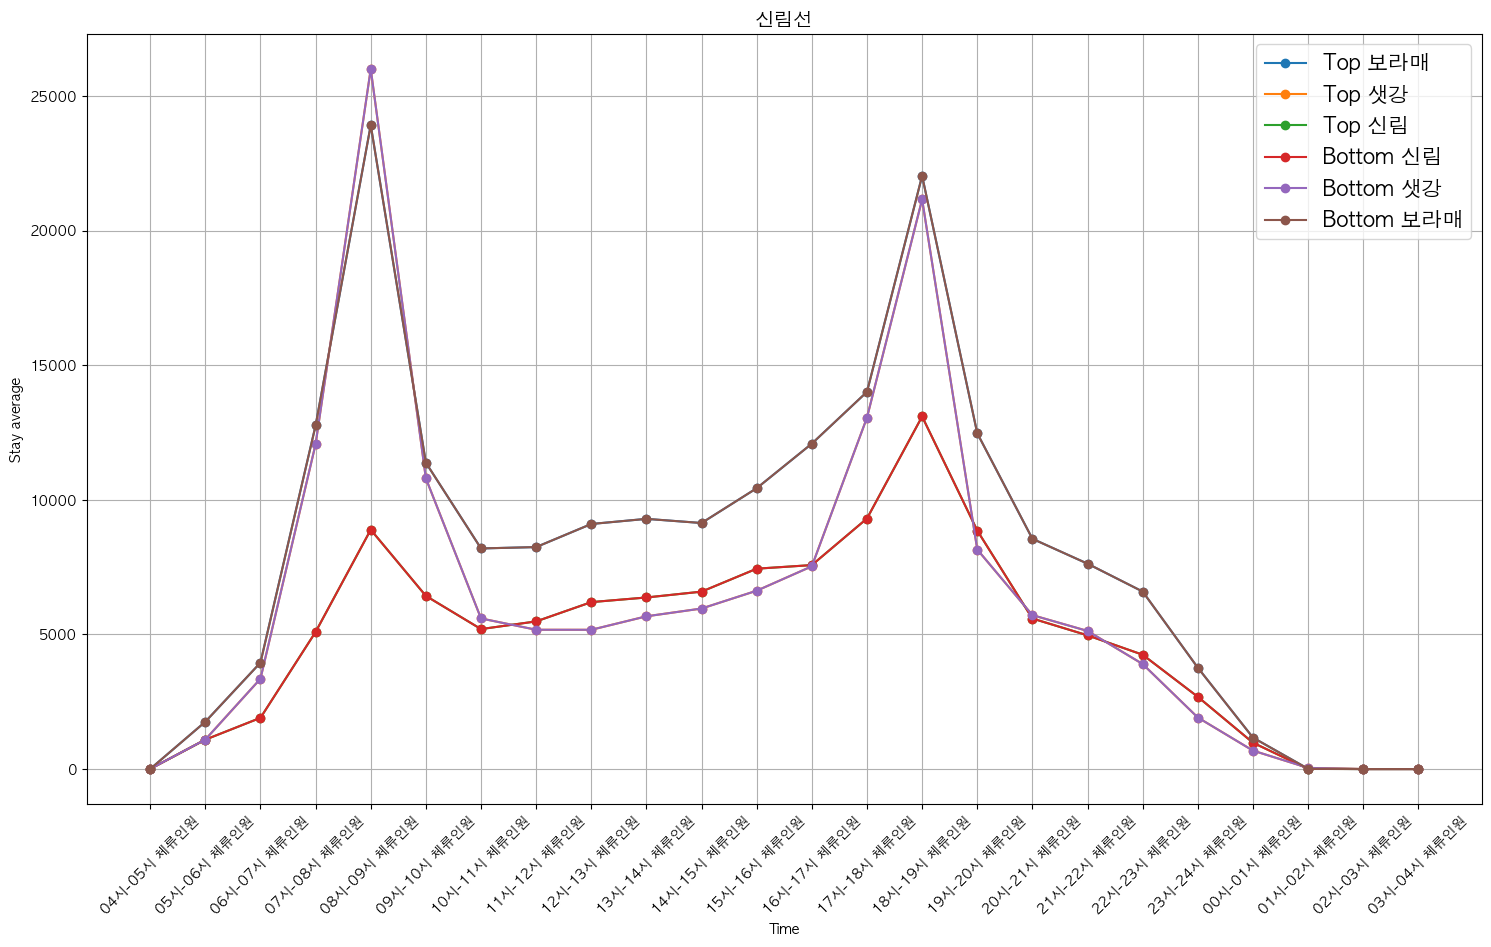

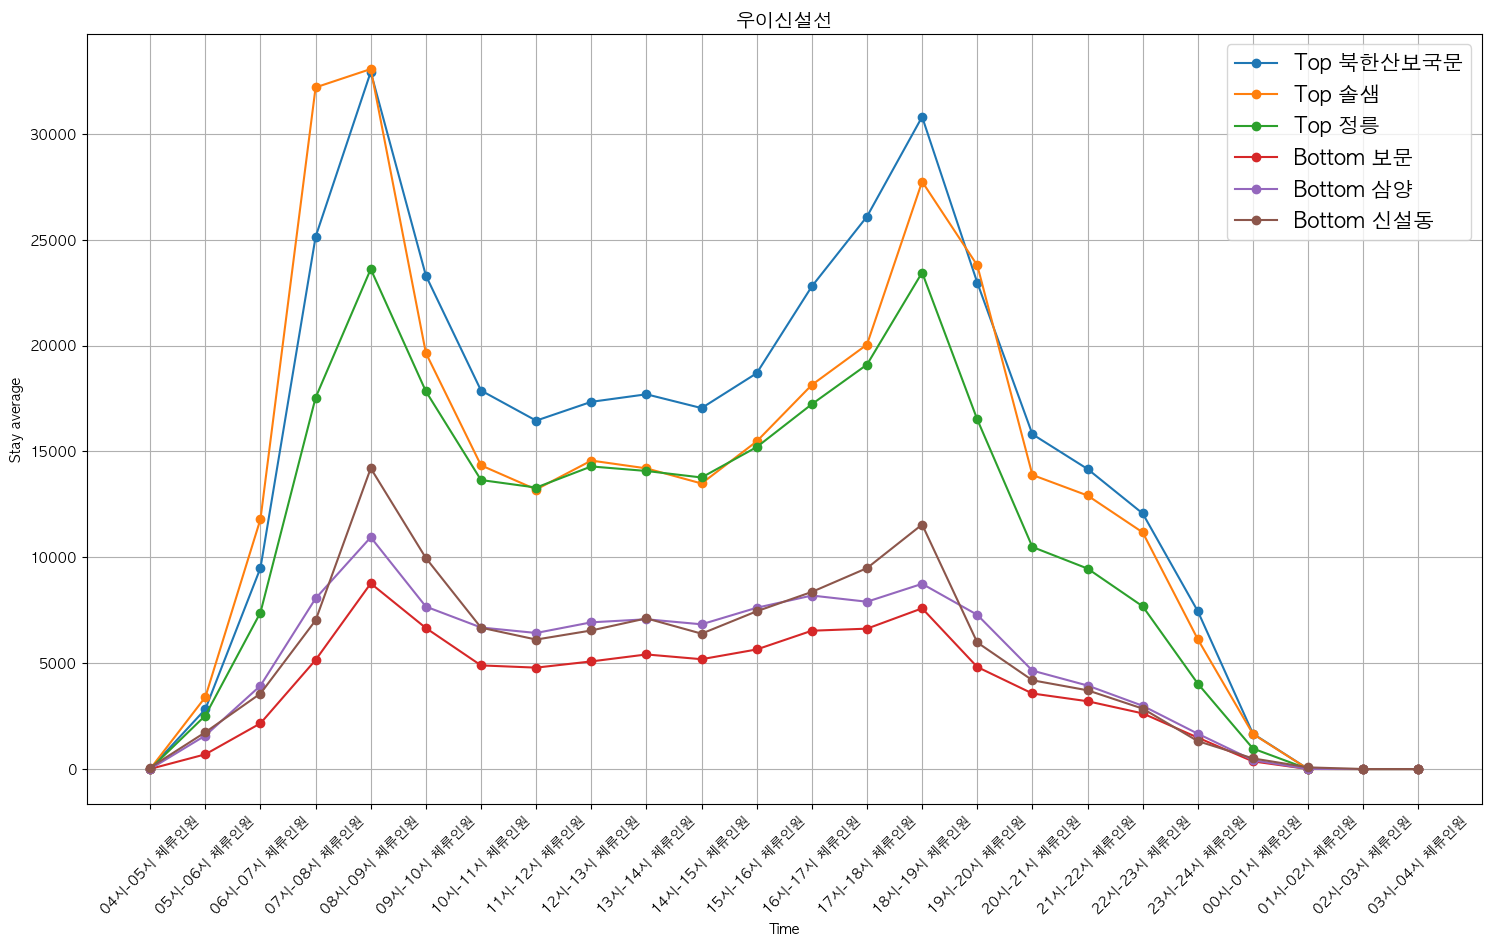

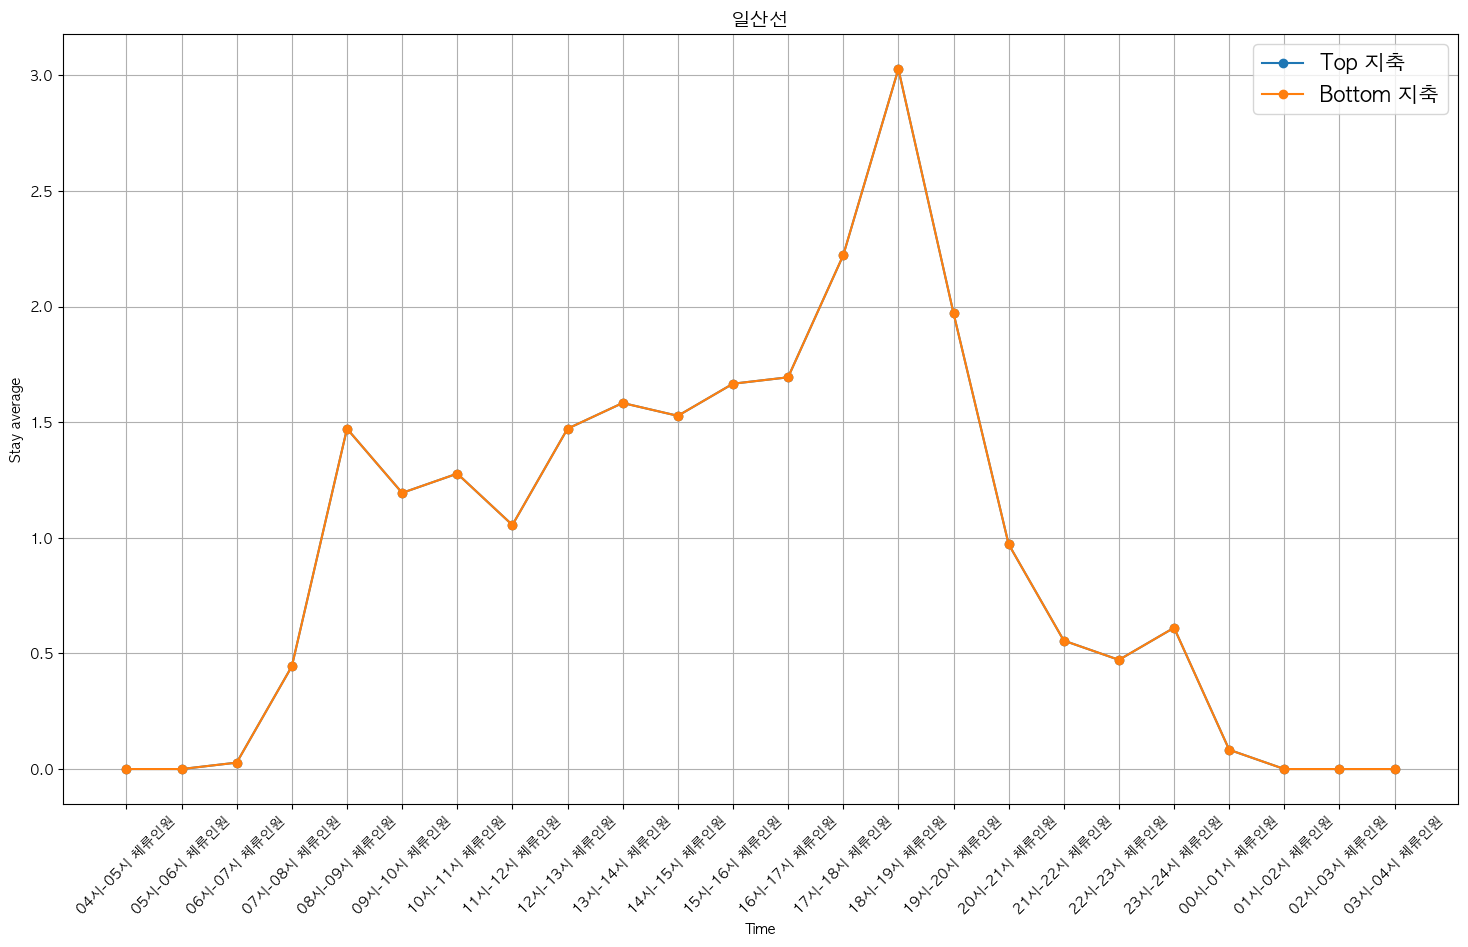

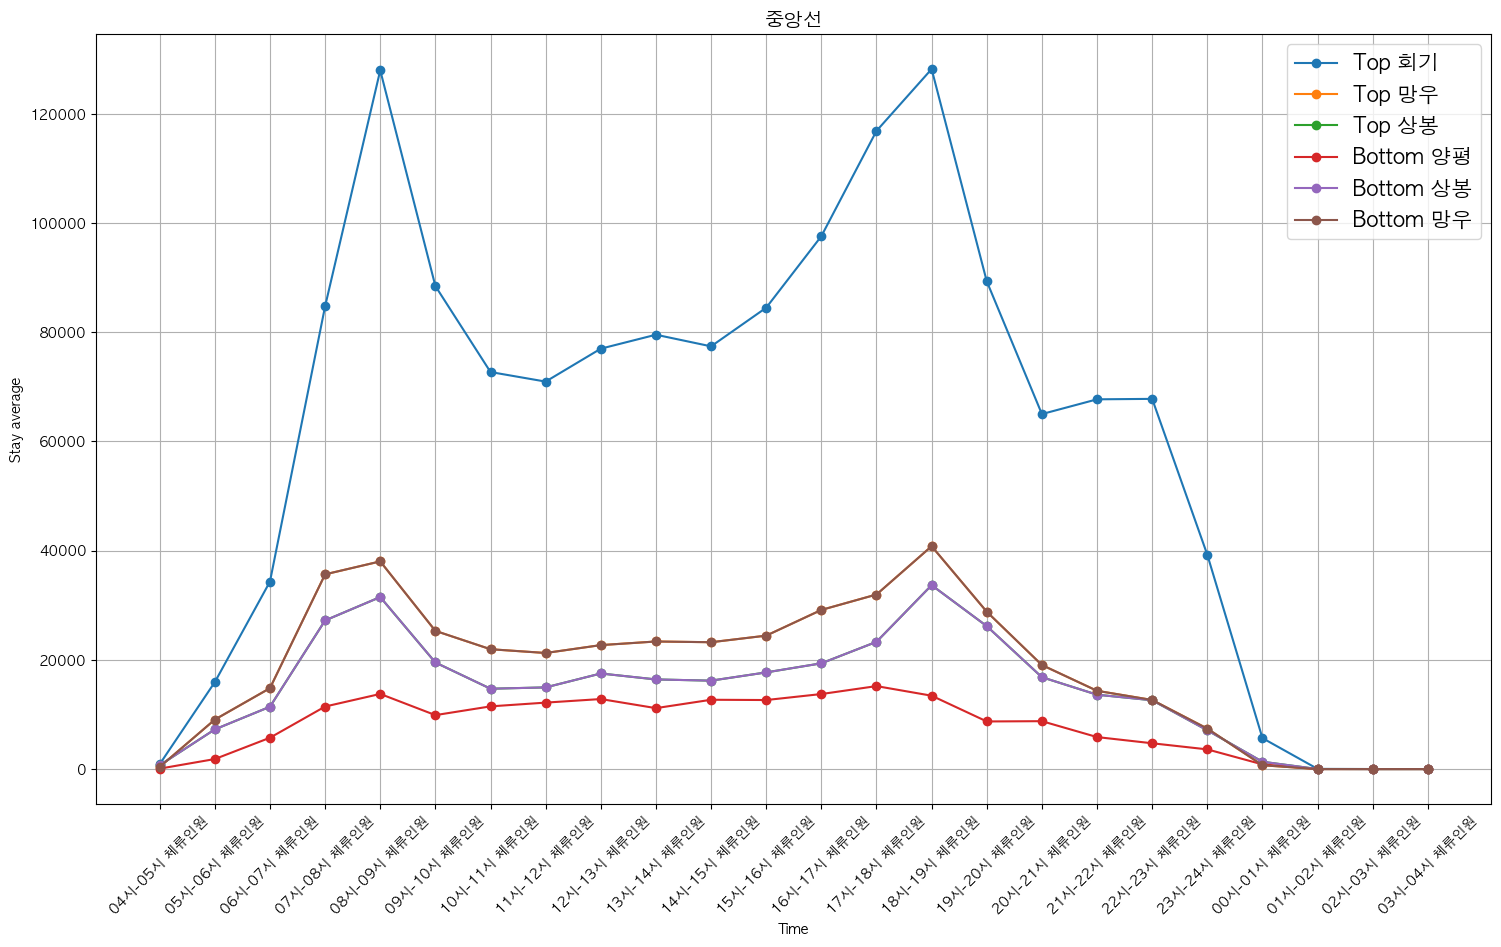

In [45]:
def plot_by_line(line_average, line_name):
    line_data = line_average[line_average['호선명'] == line_name]
    time_cols = [col for col in line_average.columns if '체류인원' in col]
    station_mean = line_data[time_cols].mean(axis=1)

    line_top_3 = station_mean.nlargest(3)
    line_bottom_3 = station_mean.nsmallest(3)

    plt.figure(figsize=(18,10))

    for station in line_top_3.index:
        plt.plot(time_cols, line_data.loc[station, time_cols],
                 marker='o', label=f'Top {line_data.loc[station, '지하철역']}')
        
    for station in line_bottom_3.index:
        plt.plot(time_cols, line_data.loc[station, time_cols],
                 marker='o', label=f'Bottom {line_data.loc[station, '지하철역']}')
    
    plt.title(f'{line_name}', fontsize=14)
    plt.xlabel('Time')
    plt.ylabel('Stay average')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='best', fontsize=15)

    plt.show()

for line in line_average['호선명'].unique():
    plot_by_line(line_average, line)

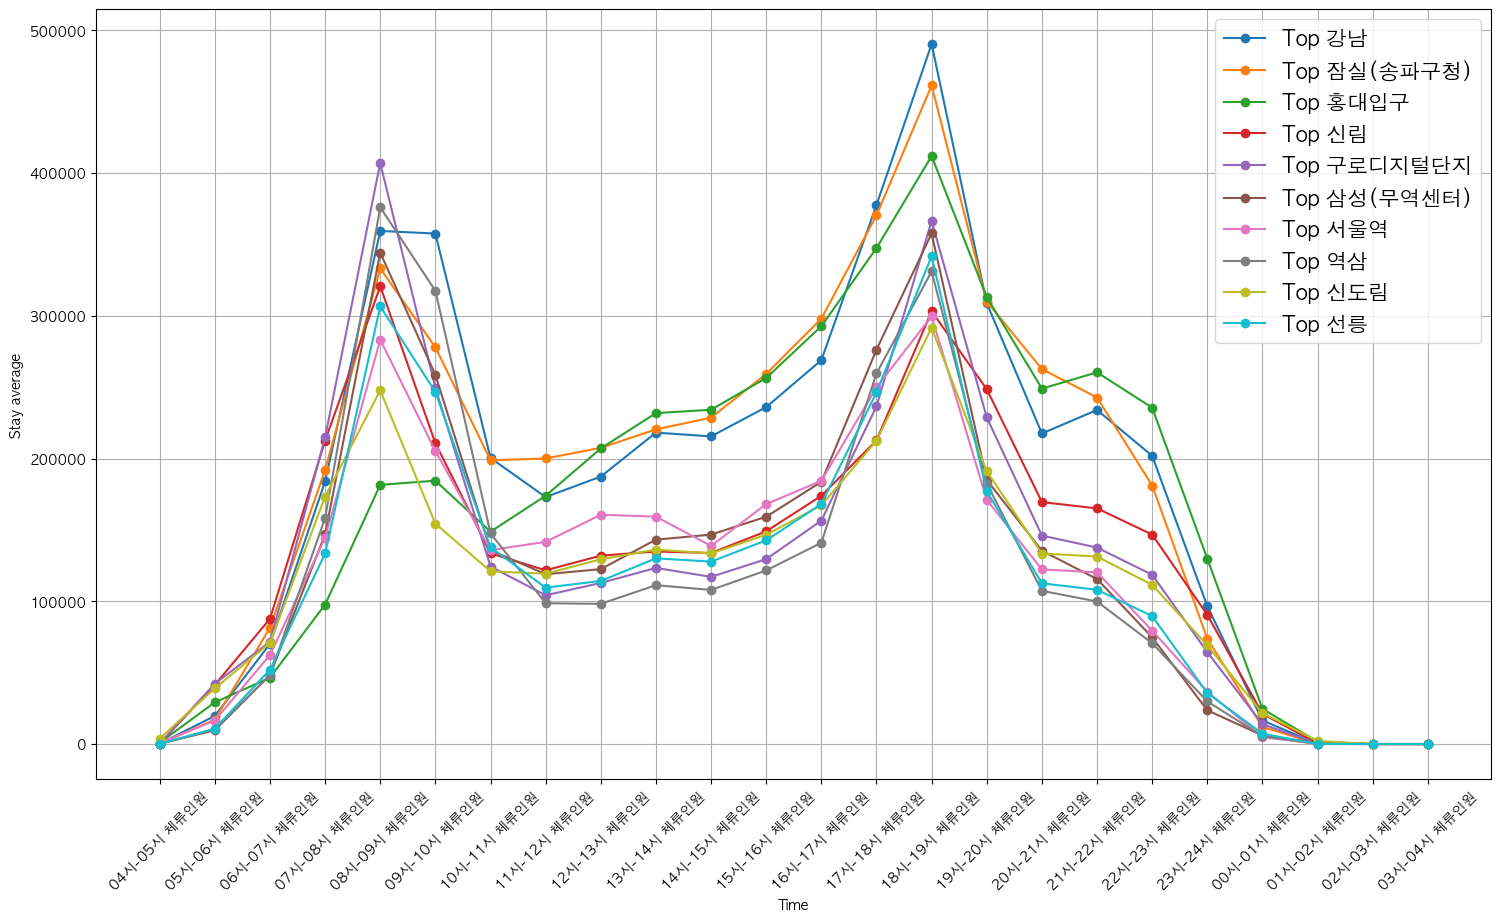

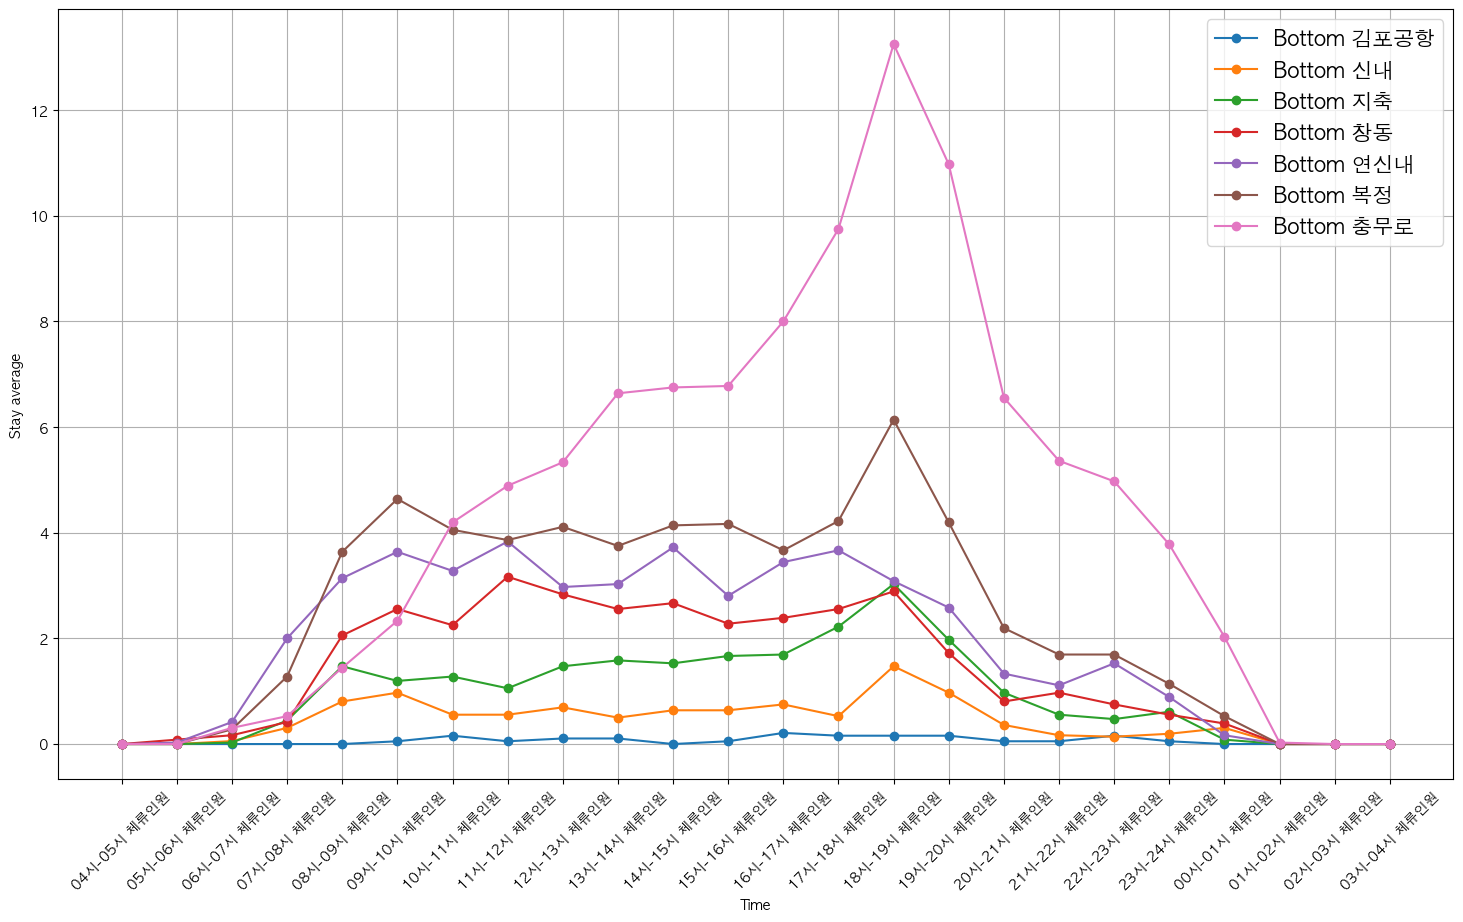

In [53]:
#def plot_by_line(line_average, line_name):
# line_data = line_average[line_average['호선명'] == line_name]
time_cols = [col for col in line_average.columns if '체류인원' in col]
station_mean = line_average[time_cols].mean(axis=1)

# 전체 역 중 상항위 10개 역의 패턴 분석

station_top_3 = station_mean.nlargest(10)
station_bottom_3 = station_mean.nsmallest(7)

plt.figure(figsize=(18,10))

for station in station_top_3.index:
    plt.plot(time_cols, line_average.loc[station, time_cols],
                marker='o', label=f'Top {line_average.loc[station, '지하철역']}')

plt.xlabel('Time')
plt.ylabel('Stay average')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best', fontsize=15)

plt.show()

plt.figure(figsize=(18,10))

for station in station_bottom_3.index:
    plt.plot(time_cols, line_average.loc[station, time_cols],
                marker='o', label=f'Bottom {line_average.loc[station, '지하철역']}')


plt.xlabel('Time')
plt.ylabel('Stay average')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best', fontsize=15)

plt.show()


### Analyze note
- 상위 10개 역은 모두 산업체 밀집 지역으로 피크타임 혼잡 패턴을 보이고 있으나 
- 하위 10개 역은 주거 지역으로 피크타임 혼잡 팬턴을 따르지 않음